# Laboratorio 1
### Javier Ovalle, Jos√© √Ångel Morales, Ricardo Morales; 22103, 22689, 22289
### Data Science
Link del repositorio: https://github.com/Saiyan-Javi/Lab1DS

Librer√≠as a utilizar importadas de una vez al inicio del archivo:

In [4]:
import numpy
numpy.version.version

'2.3.1'

In [63]:
from bs4 import BeautifulSoup
import csv
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import locale # Importar la librer√≠a locale para manejar el idioma
from scipy.stats import shapiro, normaltest # Para pruebas de normalidad
from statsmodels.tsa.stattools import adfuller

In [67]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

In [82]:
from prophet import Prophet

An√°lisis exploratorio de las importaciones de las gasolinas regular, super, diesel y gas de petroleo

Intentando cargar archivo Excel desde: C:\Users\Javier Chiquin\OneDrive\Documents\UVG\Cuarto a√±o\Segundo Semestre\Data Science\Archivos Lab1\IMPORTACIONES.xlsx
Usando hoja: Hoja1
Columnas seleccionadas: ['Diesel', 'Gas licuado de petr√≥leo', 'Gasolina regular', 'Gasolina superior']
Columna de fecha: Fecha

Archivo de Excel cargado exitosamente.

Iniciando An√°lisis Exploratorio de Datos (EDA)

Columna 'Fecha' convertida a tipo: datetime64[ns]

Columnas seleccionadas para el an√°lisis: ['Diesel', 'Gas licuado de petr√≥leo', 'Gasolina regular', 'Gasolina superior'] y Fecha

--- 1. Informaci√≥n General y Estad√≠sticas Descriptivas ---

Informaci√≥n del DataFrame (primeras filas):

      Diesel  Gas licuado de petr√≥leo  Gasolina regular  Gasolina superior  \
0  566101.99            194065.738095         177776.50          373963.96   
1  489525.80            170703.380952         123115.99          243091.07   
2  575559.68            161837.371429         161726.42          312084.38   

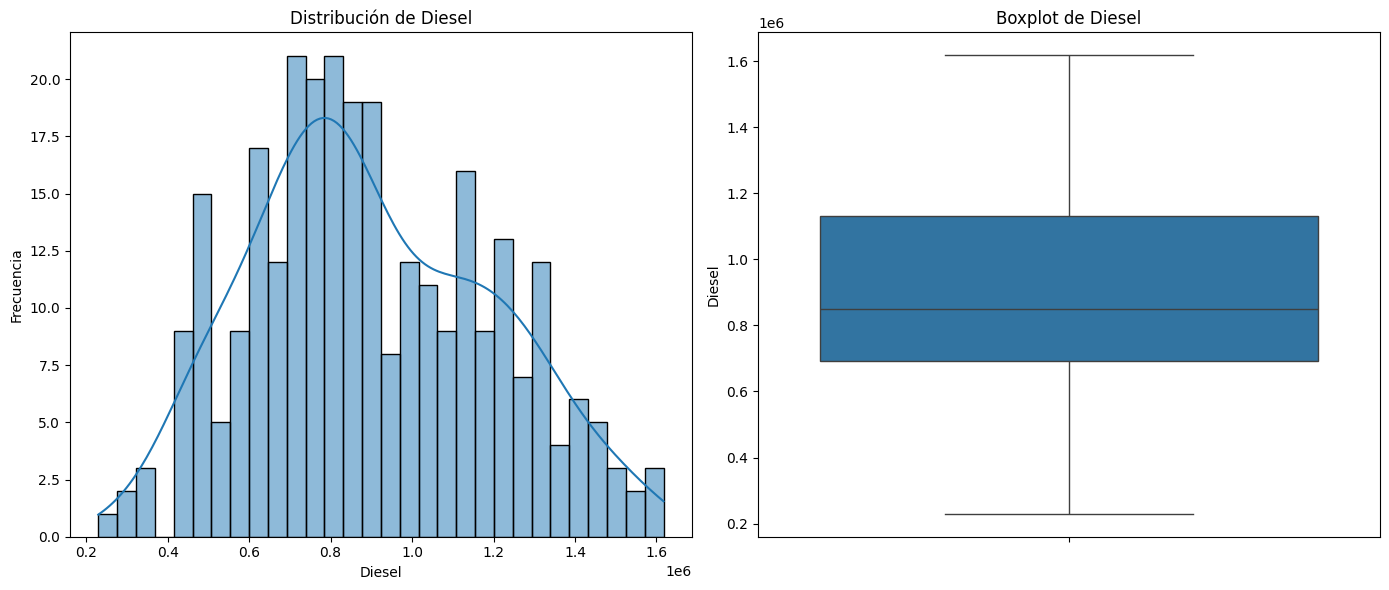

Estad√≠sticas de Distribuci√≥n para 'Diesel':
  - Media: 899560.96
  - Mediana: 850806.89
  - Desviaci√≥n Est√°ndar: 294522.86
  - Asimetr√≠a (Skewness): 0.28
  - Curtosis (Kurtosis): -0.61
  - Prueba de Normalidad (Shapiro-Wilk):
    - Estad√≠stica: 0.983, p-valor: 0.001
    - Con un nivel de significancia de 0.05, se rechaza la hip√≥tesis nula (los datos NO parecen normales).
----------------------------------------------------------------------



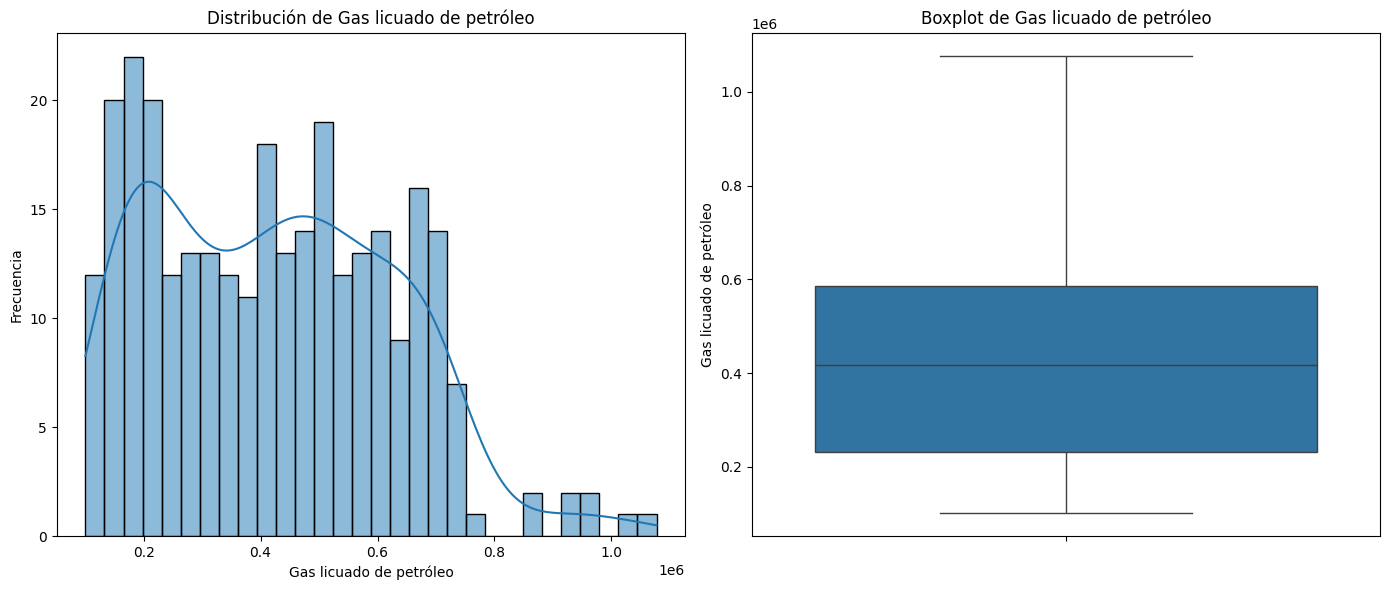

Estad√≠sticas de Distribuci√≥n para 'Gas licuado de petr√≥leo':
  - Media: 422203.68
  - Mediana: 416068.30
  - Desviaci√≥n Est√°ndar: 205906.33
  - Asimetr√≠a (Skewness): 0.41
  - Curtosis (Kurtosis): -0.44
  - Prueba de Normalidad (Shapiro-Wilk):
    - Estad√≠stica: 0.958, p-valor: 0.000
    - Con un nivel de significancia de 0.05, se rechaza la hip√≥tesis nula (los datos NO parecen normales).
----------------------------------------------------------------------



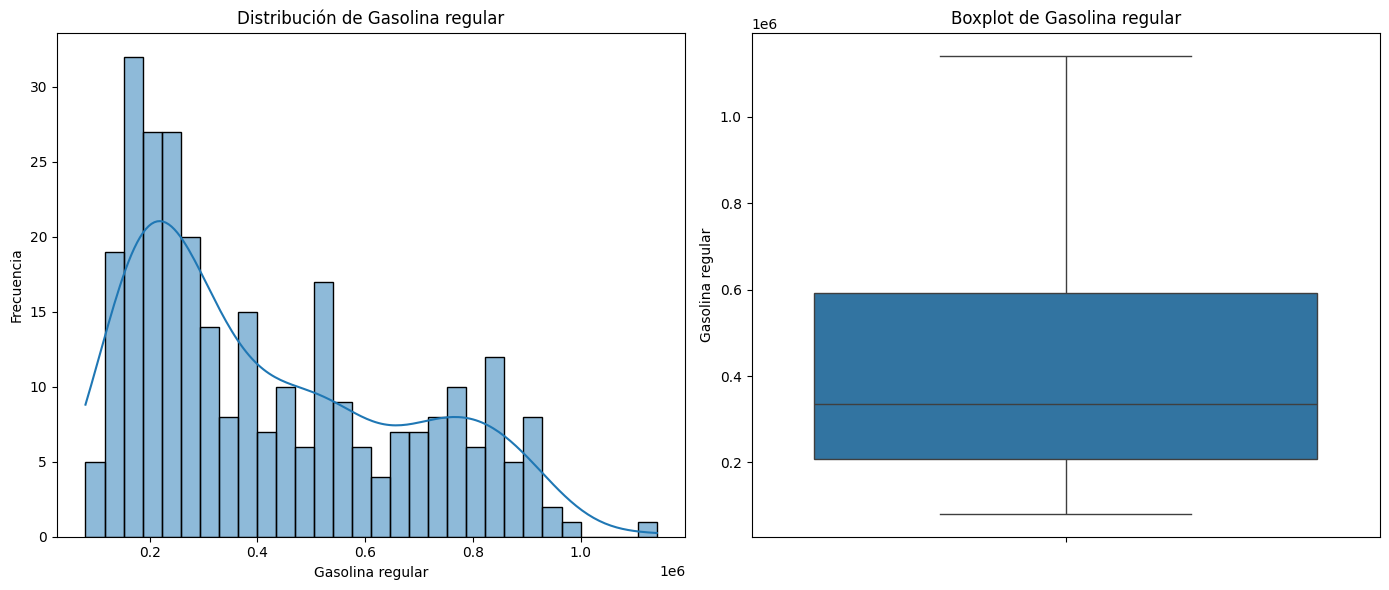

Estad√≠sticas de Distribuci√≥n para 'Gasolina regular':
  - Media: 419995.88
  - Mediana: 336005.72
  - Desviaci√≥n Est√°ndar: 247117.97
  - Asimetr√≠a (Skewness): 0.66
  - Curtosis (Kurtosis): -0.78
  - Prueba de Normalidad (Shapiro-Wilk):
    - Estad√≠stica: 0.905, p-valor: 0.000
    - Con un nivel de significancia de 0.05, se rechaza la hip√≥tesis nula (los datos NO parecen normales).
----------------------------------------------------------------------



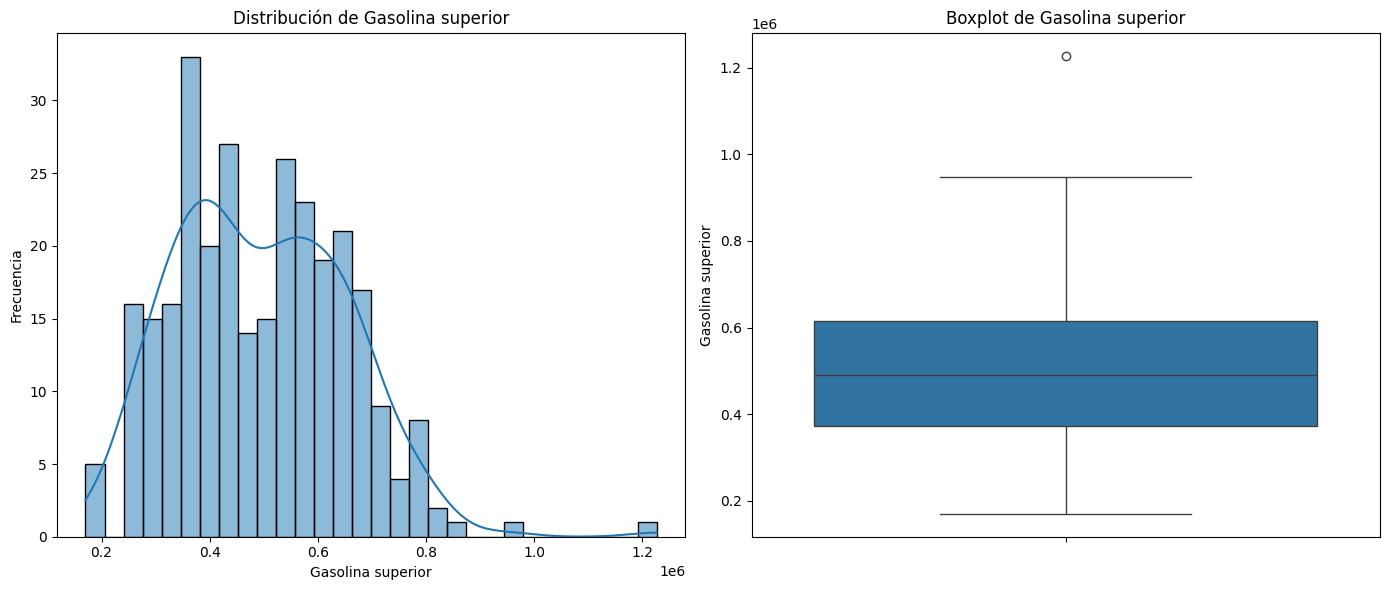

Estad√≠sticas de Distribuci√≥n para 'Gasolina superior':
  - Media: 494587.46
  - Mediana: 491194.71
  - Desviaci√≥n Est√°ndar: 157844.29
  - Asimetr√≠a (Skewness): 0.48
  - Curtosis (Kurtosis): 0.59
  - Prueba de Normalidad (Shapiro-Wilk):
    - Estad√≠stica: 0.975, p-valor: 0.000
    - Con un nivel de significancia de 0.05, se rechaza la hip√≥tesis nula (los datos NO parecen normales).
----------------------------------------------------------------------


----------------------------------------------------------------------

--- 3. An√°lisis de Correlaci√≥n ---

Matriz de Correlaci√≥n de Pearson:

                           Diesel  Gas licuado de petr√≥leo  Gasolina regular  \
Diesel                   1.000000                 0.541365          0.737977   
Gas licuado de petr√≥leo  0.541365                 1.000000          0.717743   
Gasolina regular         0.737977                 0.717743          1.000000   
Gasolina superior        0.650415                 0.568808          

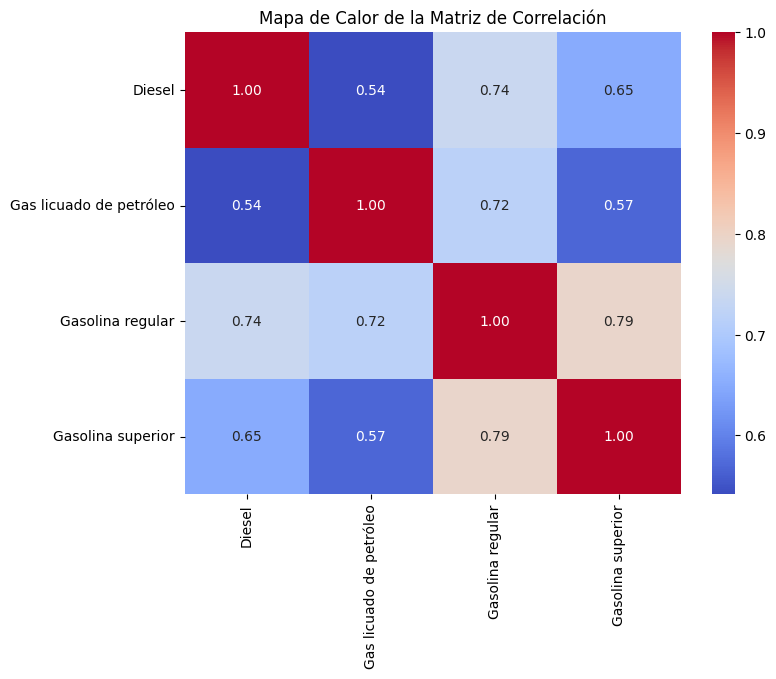

Los valores cercanos a 1 o -1 indican una fuerte correlaci√≥n positiva o negativa, respectivamente.

----------------------------------------------------------------------

--- 4. An√°lisis del Comportamiento Temporal (Anual) ---

Tendencia anual de importaciones (Picos por A√±o y Tipo de Combustible):



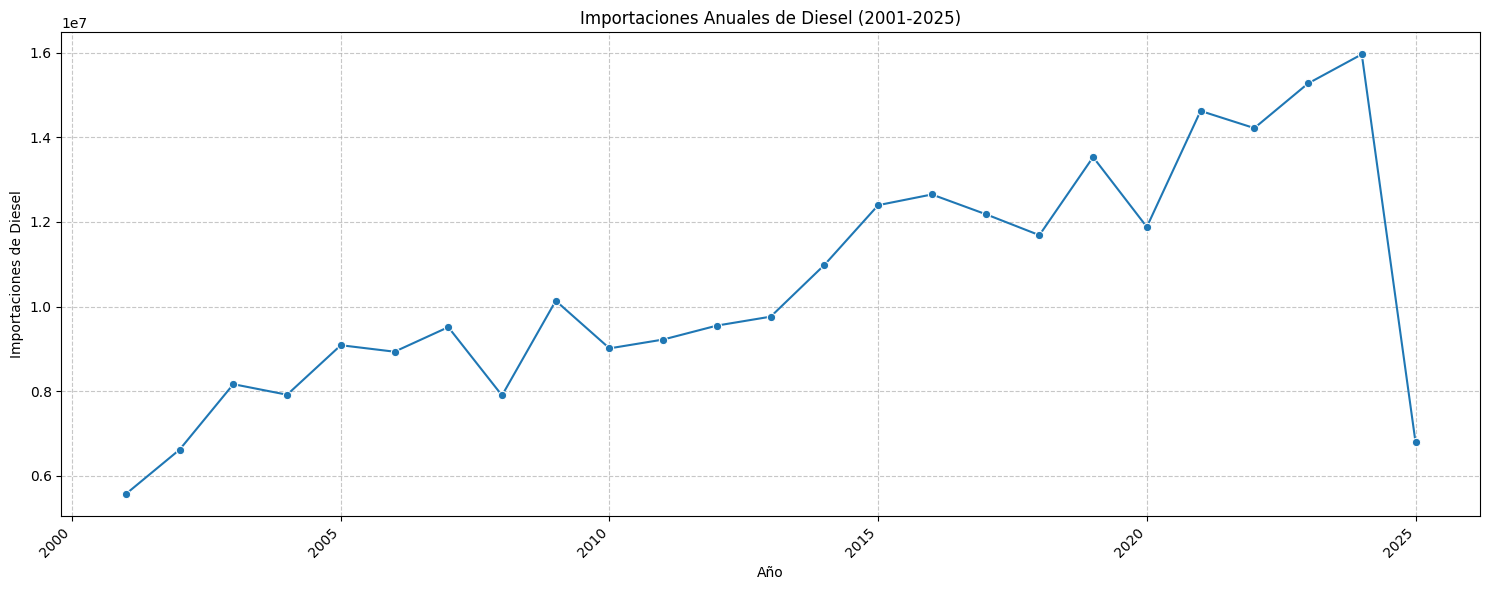

    - Pico anual para Diesel: 15964666.06 en el a√±o 2024
    - Valle anual para Diesel: 5567077.54 en el a√±o 2001



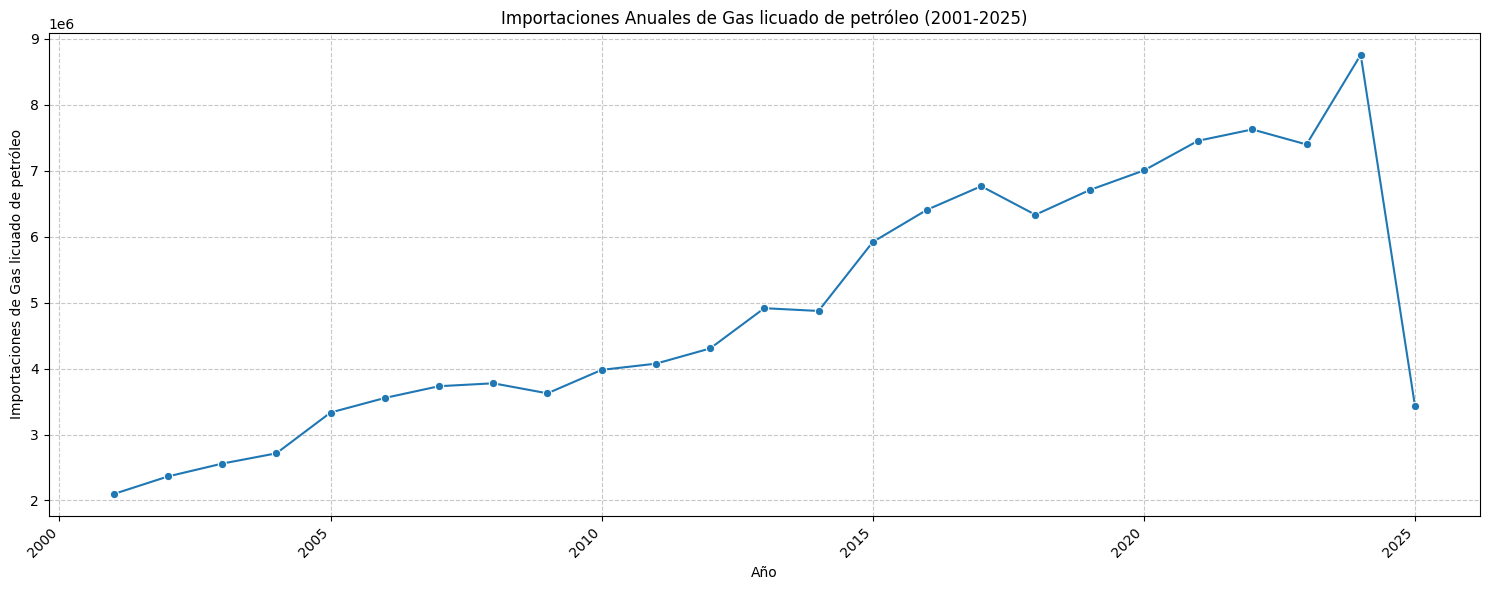

    - Pico anual para Gas licuado de petr√≥leo: 8757484.67 en el a√±o 2024
    - Valle anual para Gas licuado de petr√≥leo: 2097517.47 en el a√±o 2001



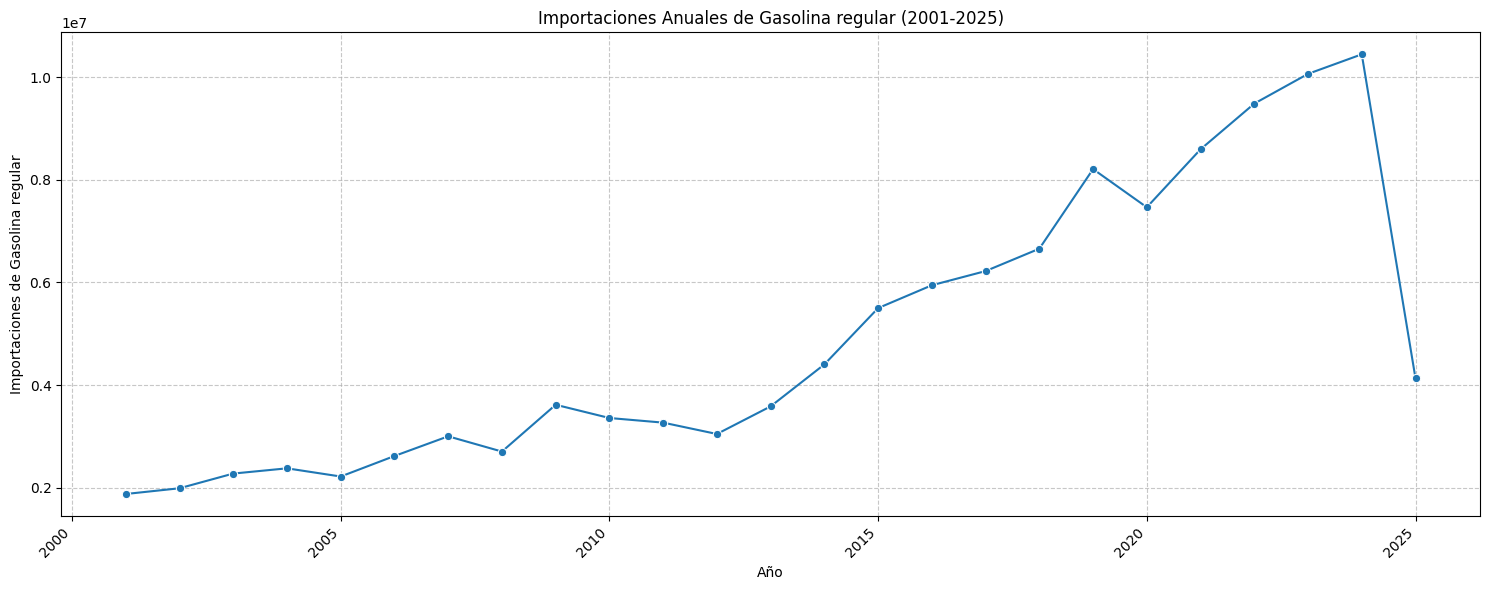

    - Pico anual para Gasolina regular: 10445583.73 en el a√±o 2024
    - Valle anual para Gasolina regular: 1877504.23 en el a√±o 2001



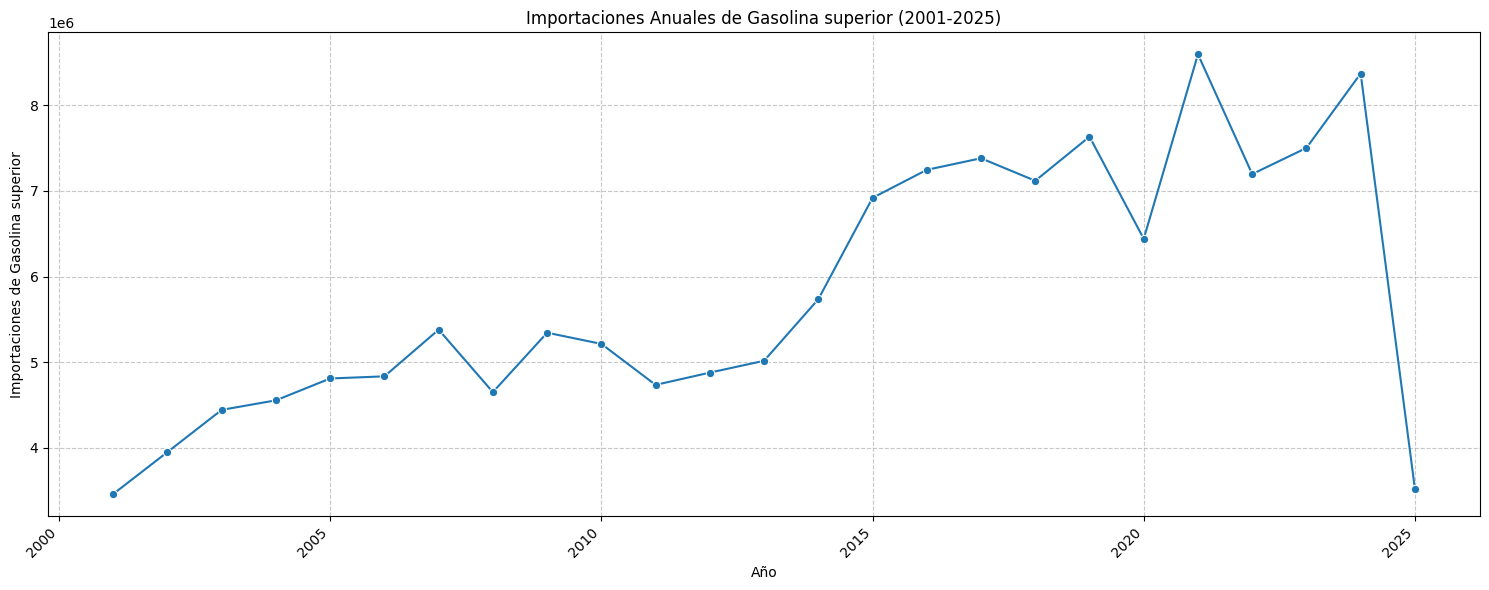

    - Pico anual para Gasolina superior: 8595855.05 en el a√±o 2021
    - Valle anual para Gasolina superior: 3458874.87 en el a√±o 2001


----------------------------------------------------------------------

--- 5. An√°lisis de Comportamiento en Per√≠odos Espec√≠ficos ---

Comportamiento en los √öltimos 5 A√±os:

  Debug: Rango de a√±os para '√∫ltimos 5': 2021-2025
  Debug: Filas en df_ultimos_a√±os: 53


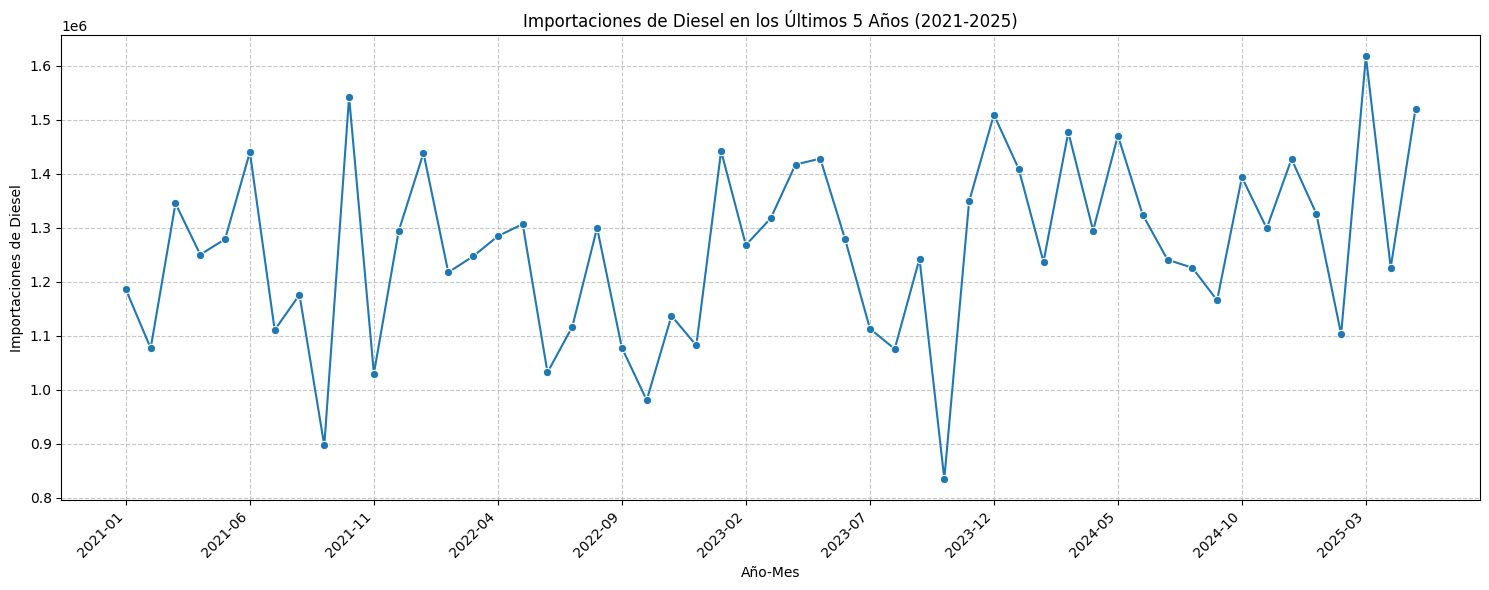

    - Tendencia de Diesel en los √∫ltimos 5 a√±os.



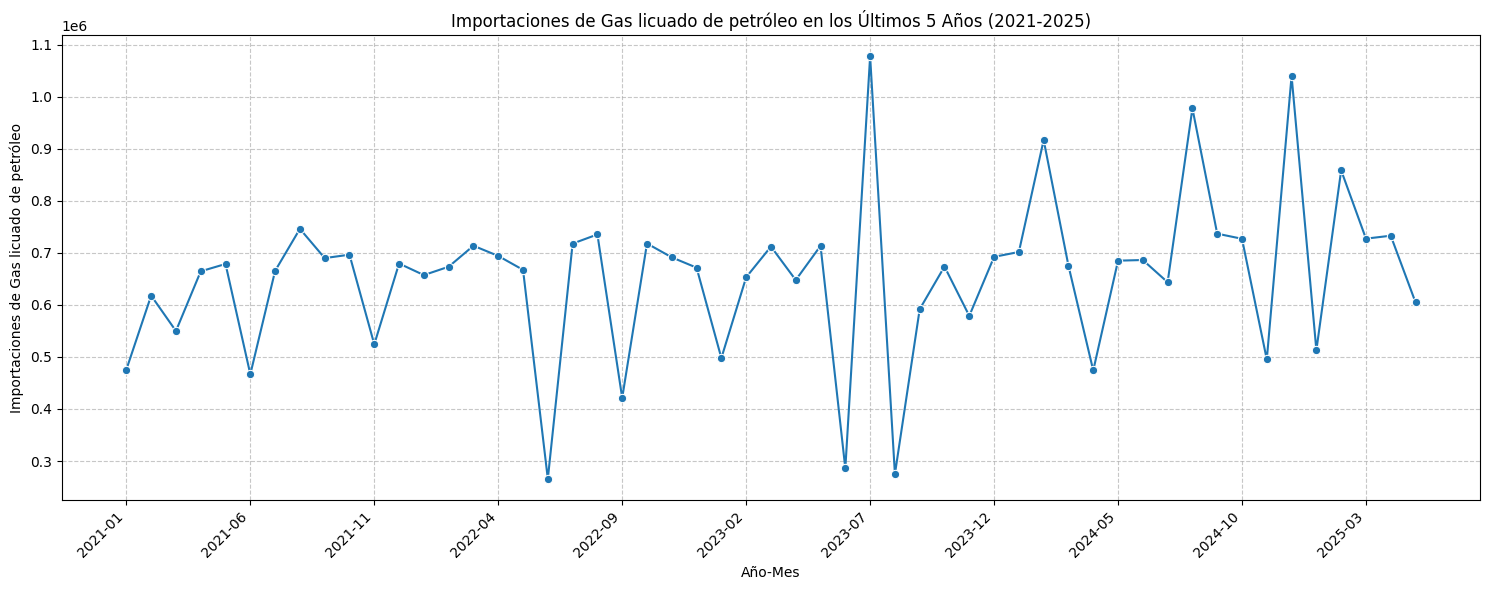

    - Tendencia de Gas licuado de petr√≥leo en los √∫ltimos 5 a√±os.



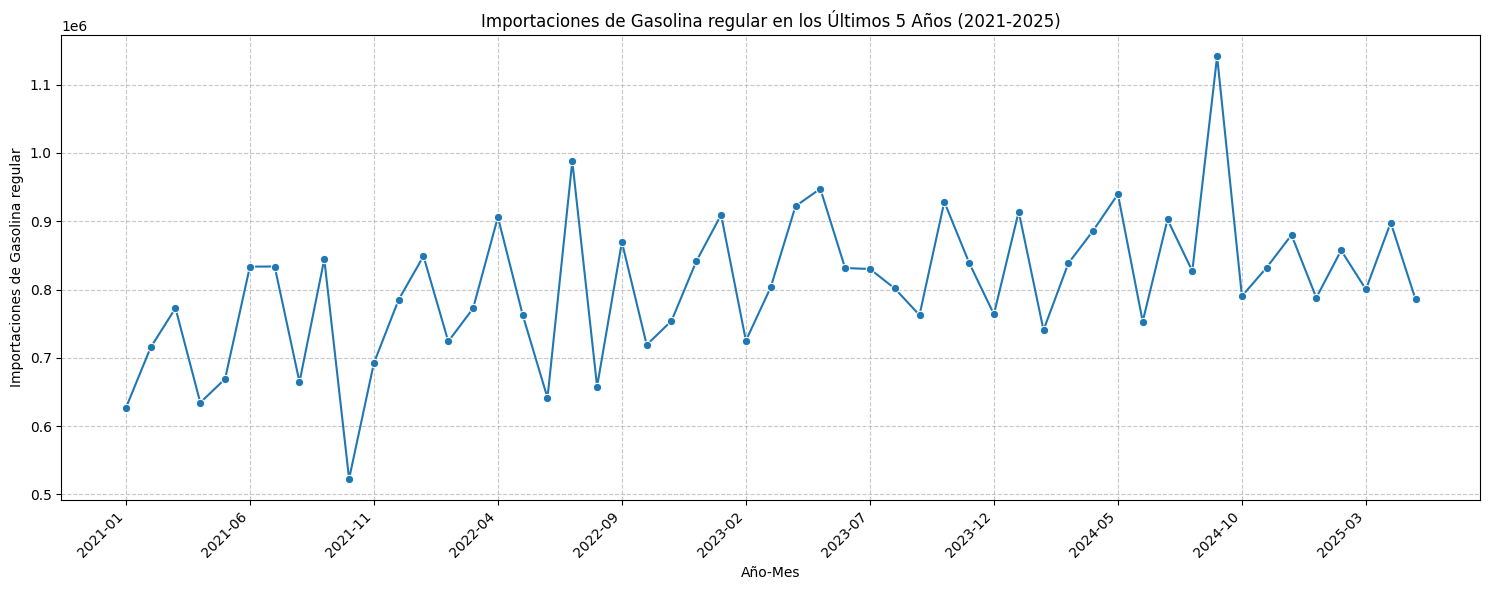

    - Tendencia de Gasolina regular en los √∫ltimos 5 a√±os.



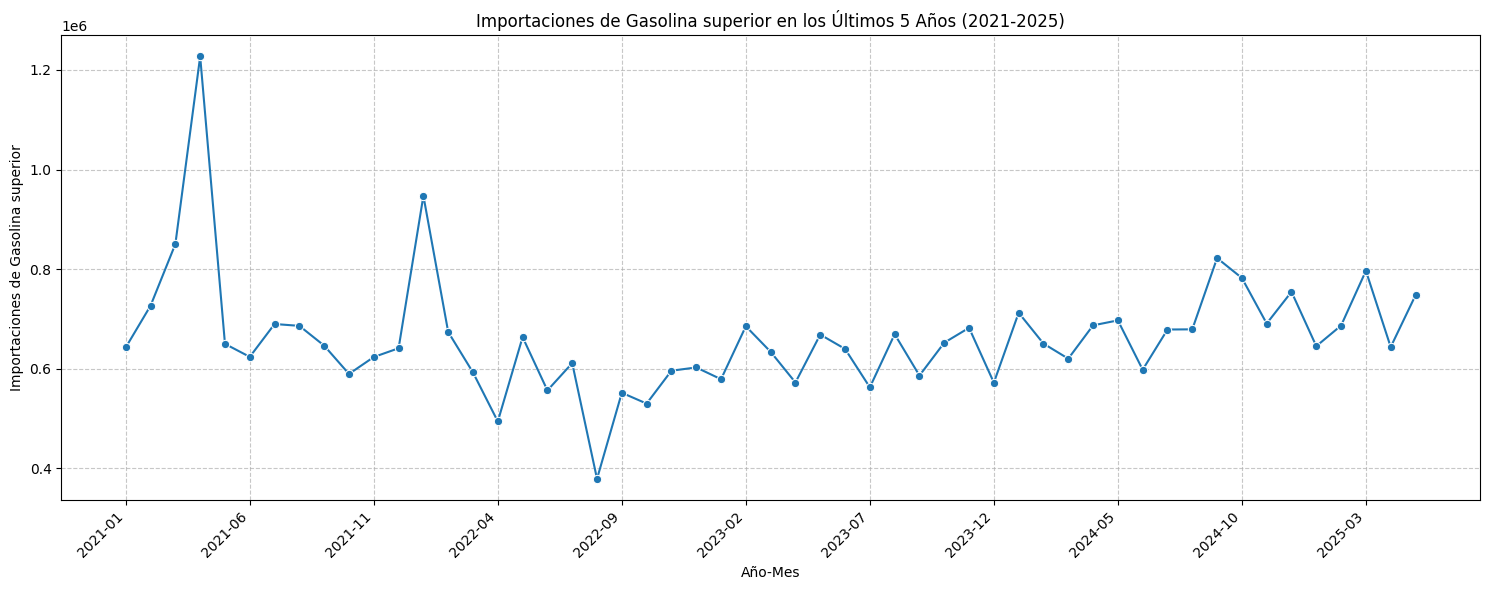

    - Tendencia de Gasolina superior en los √∫ltimos 5 a√±os.


----------------------------------------------------------------------

Comportamiento Durante la Pandemia (2020-01 a 2021-12):

  Debug: Filas en df_pandemia: 24


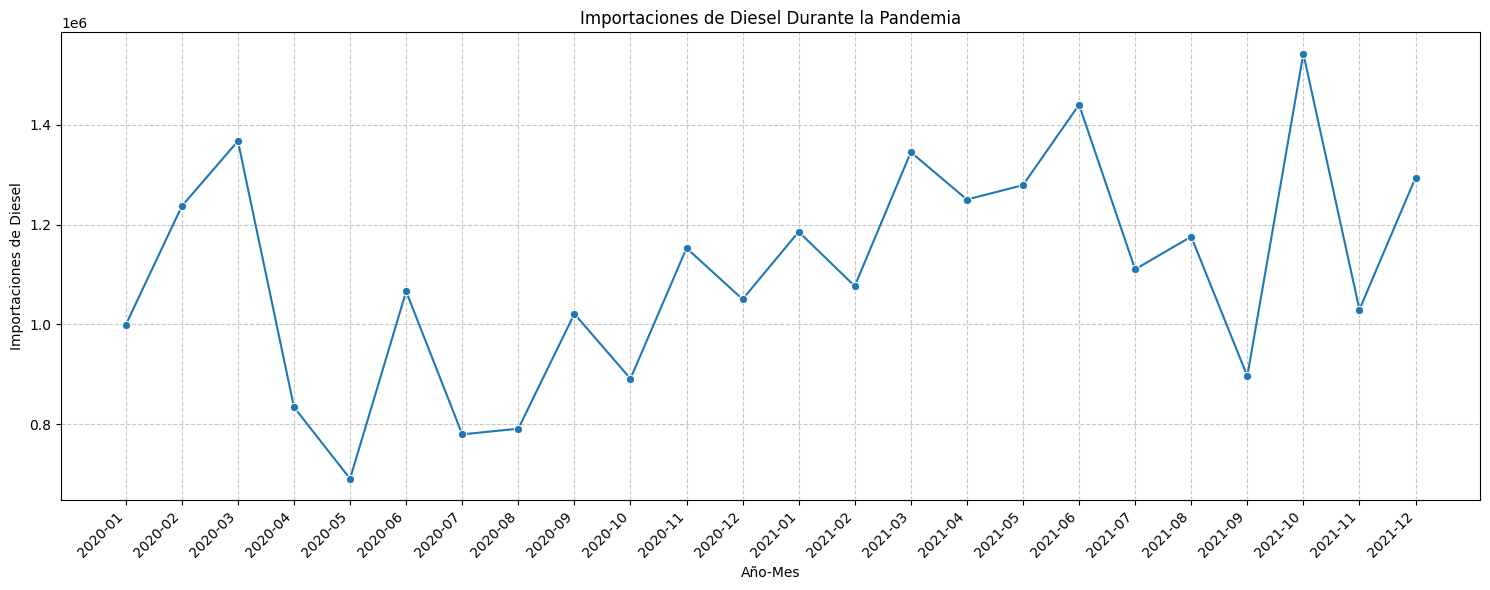

    - Tendencia de Diesel durante la pandemia. Media: 1104523.23



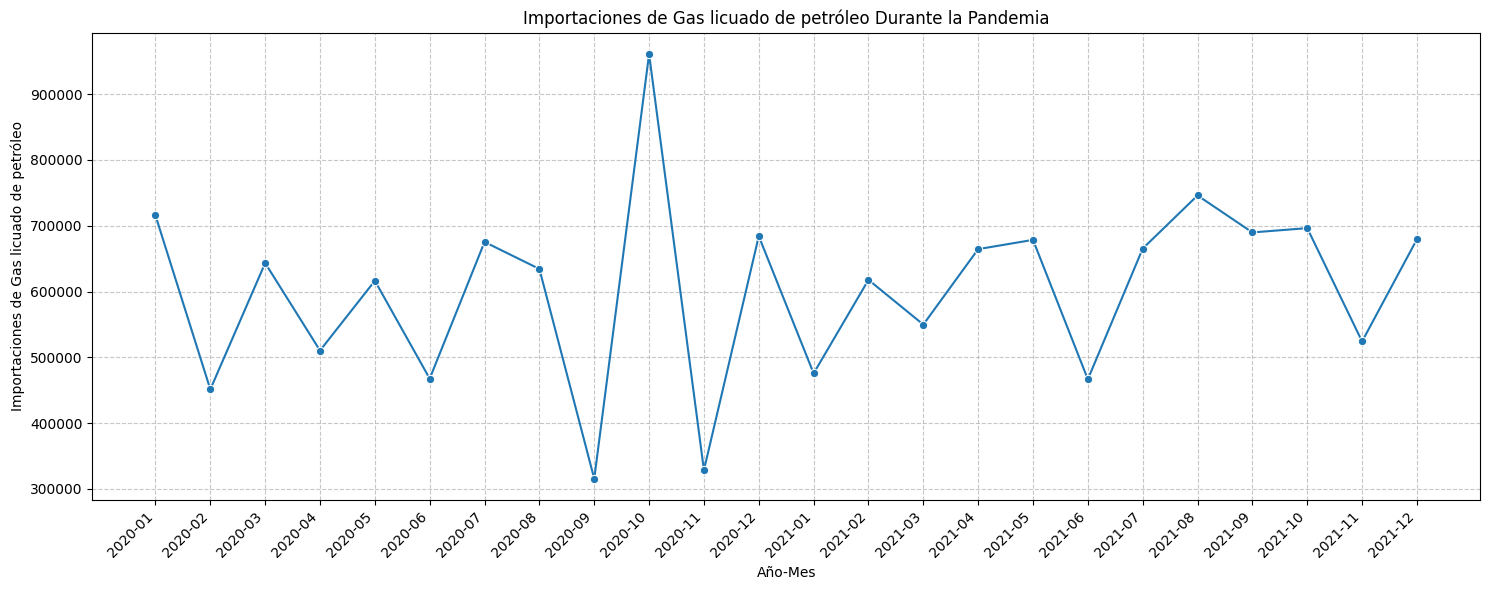

    - Tendencia de Gas licuado de petr√≥leo durante la pandemia. Media: 602385.85



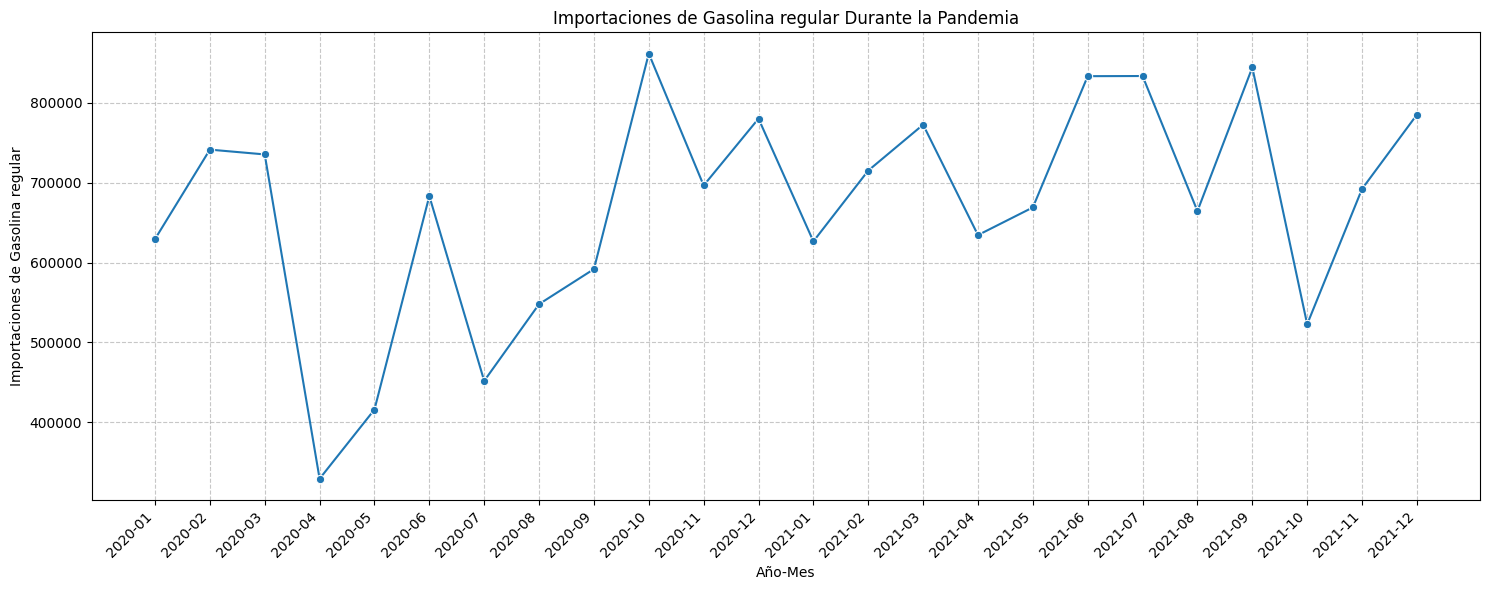

    - Tendencia de Gasolina regular durante la pandemia. Media: 669143.26



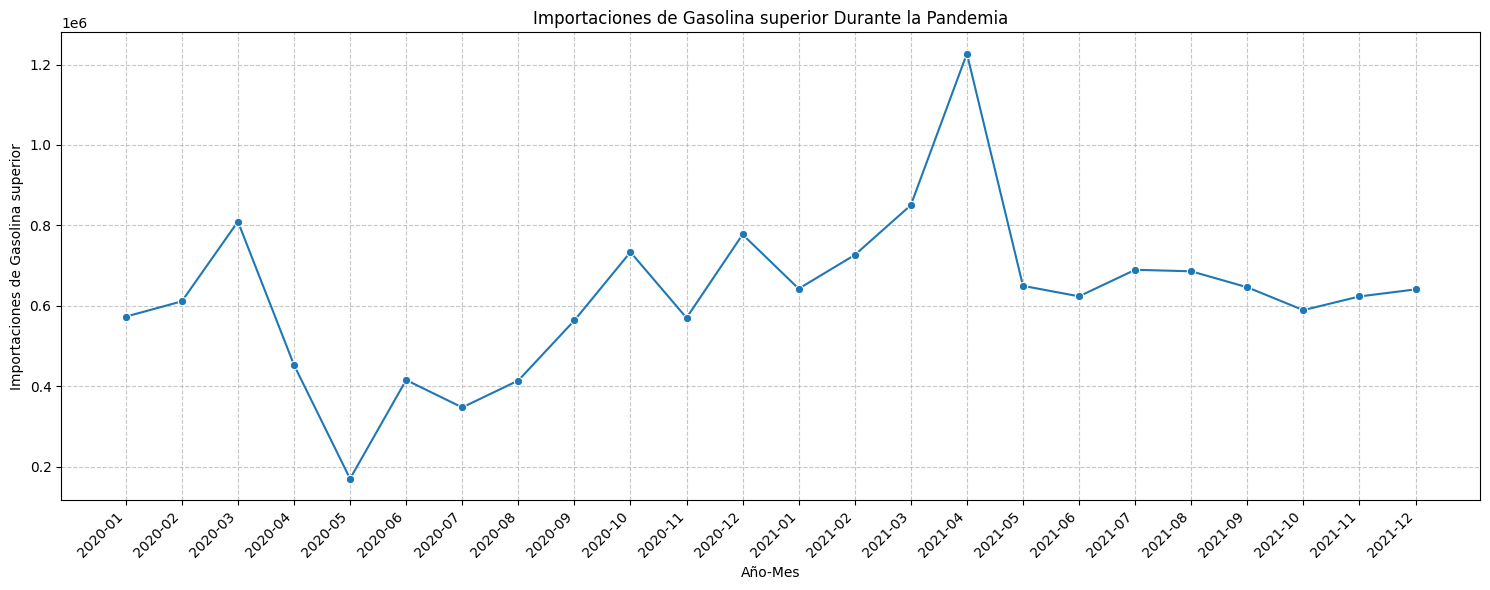

    - Tendencia de Gasolina superior durante la pandemia. Media: 626510.54


----------------------------------------------------------------------

An√°lisis Exploratorio de Datos completado. ¬°Todos los puntos cubiertos!


In [68]:

try:
    locale.setlocale(locale.LC_TIME, 'es_ES.UTF-8')
except locale.Error:
    try:
        locale.setlocale(locale.LC_TIME, 'es_ES')
    except locale.Error:
        try:
            locale.setlocale(locale.LC_TIME, 'Spanish_Spain.1252')
        except locale.Error:
            print("Advertencia: No se pudo establecer la configuraci√≥n regional en espa√±ol para el manejo de fechas. "
                  "La conversi√≥n de fechas con nombres de mes ('ene', 'feb') podr√≠a fallar.")
            print("Por favor, verifica las opciones de locale para tu sistema operativo.")


def exploracion_eda(df, columnas_seleccionadas, columna_fecha):
    """
    Realiza un an√°lisis exploratorio de datos (EDA) en columnas espec√≠ficas de un DataFrame,
    incluyendo distribuci√≥n, correlaci√≥n, histogramas de fecha y an√°lisis de requisitos espec√≠ficos.

    Args:
        df (pd.DataFrame): El DataFrame de Pandas a analizar.
        columnas_seleccionadas (list): Una lista de las 4 columnas espec√≠ficas a analizar (o m√°s).
        columna_fecha (str): El nombre de la columna que contiene los datos de fecha.
    """

    print("Iniciando An√°lisis Exploratorio de Datos (EDA)\n")

    # Verificar que las columnas existan en el DataFrame
    for col in columnas_seleccionadas + [columna_fecha]:
        if col not in df.columns:
            print(f"Error: La columna '{col}' no se encuentra en el DataFrame. Por favor, verifica los nombres.")
            return

    df_seleccionado = df[columnas_seleccionadas + [columna_fecha]].copy()

    # Convertir la columna de fecha a formato datetime
    try:
        df_seleccionado[columna_fecha] = pd.to_datetime(df_seleccionado[columna_fecha], format='%b/%Y')
        print(f"Columna '{columna_fecha}' convertida a tipo: {df_seleccionado[columna_fecha].dtype}\n")
    except Exception as e:
        print(f"Error CR√çTICO: No se pudo convertir la columna '{columna_fecha}' a datetime con el formato '%b/%Y'.")
        print(f"Mensaje de error: {e}")
        print("Aseg√∫rate de que las fechas en tu Excel tengan el formato 'mes_abreviado/a√±o' (ej. 'ene/2001') "
              "y que la configuraci√≥n regional en espa√±ol se haya aplicado correctamente.")
        return # Salir si la fecha no se puede convertir, ya que muchas partes dependen de ello

    print(f"Columnas seleccionadas para el an√°lisis: {columnas_seleccionadas} y {columna_fecha}\n")

    # --- 1. Informaci√≥n General y Estad√≠sticas Descriptivas ---
    print("--- 1. Informaci√≥n General y Estad√≠sticas Descriptivas ---\n")
    print("Informaci√≥n del DataFrame (primeras filas):\n")
    print(df_seleccionado.head())
    print("\n")

    print("Estad√≠sticas descriptivas de las columnas seleccionadas:\n")
    print(df_seleccionado[columnas_seleccionadas].describe().T)
    print("\n")

    print("Valores nulos por columna:\n")
    print(df_seleccionado[columnas_seleccionadas + [columna_fecha]].isnull().sum())
    print("\n" + "-"*70 + "\n")

    # --- 2. An√°lisis de Distribuci√≥n (Histogramas, Boxplots y Pruebas de Normalidad) ---
    print("--- 2. An√°lisis de Distribuci√≥n (Histogramas, Boxplots y Pruebas de Normalidad) ---\n")
    numeric_cols = df_seleccionado[columnas_seleccionadas].select_dtypes(include=np.number).columns.tolist()

    if not numeric_cols:
        print("No hay columnas num√©ricas continuas entre las seleccionadas para el an√°lisis de distribuci√≥n.")
    else:
        for col in numeric_cols:
            plt.figure(figsize=(14, 6))

            # Histograma
            plt.subplot(1, 2, 1)
            sns.histplot(df_seleccionado[col].dropna(), kde=True, bins=30)
            plt.title(f'Distribuci√≥n de {col}')
            plt.xlabel(col)
            plt.ylabel('Frecuencia')

            # Boxplot
            plt.subplot(1, 2, 2)
            sns.boxplot(y=df_seleccionado[col].dropna())
            plt.title(f'Boxplot de {col}')
            plt.ylabel(col)

            plt.tight_layout()
            plt.show()

            print(f"Estad√≠sticas de Distribuci√≥n para '{col}':")
            print(f"  - Media: {df_seleccionado[col].mean():.2f}")
            print(f"  - Mediana: {df_seleccionado[col].median():.2f}")
            print(f"  - Desviaci√≥n Est√°ndar: {df_seleccionado[col].std():.2f}")
            print(f"  - Asimetr√≠a (Skewness): {df_seleccionado[col].skew():.2f}")
            print(f"  - Curtosis (Kurtosis): {df_seleccionado[col].kurtosis():.2f}")

            # Prueba de normalidad (Shapiro-Wilk para N < 5000, D'Agostino-Pearson para N >= 20)
            data_to_test = df_seleccionado[col].dropna()
            if len(data_to_test) >= 20: # Tama√±o m√≠nimo para las pruebas
                if len(data_to_test) < 5000:
                    try:
                        stat, p = shapiro(data_to_test)
                        test_name = "Shapiro-Wilk"
                    except Exception as test_e:
                        print(f"  - Error al ejecutar Shapiro-Wilk: {test_e}. Intentando D'Agostino-Pearson.")
                        stat, p = normaltest(data_to_test)
                        test_name = "D'Agostino-Pearson"
                else:
                    stat, p = normaltest(data_to_test) # D'Agostino-Pearson
                    test_name = "D'Agostino-Pearson"

                print(f"  - Prueba de Normalidad ({test_name}):")
                print(f"    - Estad√≠stica: {stat:.3f}, p-valor: {p:.3f}")
                alpha = 0.05
                if p > alpha:
                    print(f"    - Con un nivel de significancia de {alpha}, no se puede rechazar la hip√≥tesis nula (los datos parecen normales).")
                else:
                    print(f"    - Con un nivel de significancia de {alpha}, se rechaza la hip√≥tesis nula (los datos NO parecen normales).")
            else:
                print("  - No hay suficientes datos para realizar una prueba de normalidad formal (se necesitan al menos 20 observaciones).")

            print("-" * 70 + "\n")
    print("\n" + "-"*70 + "\n")

    # --- 3. An√°lisis de Correlaci√≥n (entre columnas num√©ricas) ---
    print("--- 3. An√°lisis de Correlaci√≥n ---\n")
    if len(numeric_cols) > 1:
        corr_matrix = df_seleccionado[numeric_cols].corr()
        print("Matriz de Correlaci√≥n de Pearson:\n")
        print(corr_matrix)
        print("\n")

        plt.figure(figsize=(8, 6))
        sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
        plt.title('Mapa de Calor de la Matriz de Correlaci√≥n')
        plt.show()
        print("Los valores cercanos a 1 o -1 indican una fuerte correlaci√≥n positiva o negativa, respectivamente.")
    else:
        print("Se necesitan al menos dos columnas num√©ricas para calcular la correlaci√≥n.")
    print("\n" + "-"*70 + "\n")

    # --- 4. Comportamiento Temporal (Agrupado por A√±o y Mes Estacional) ---
    print(f"--- 4. An√°lisis del Comportamiento Temporal (Anual) ---\n")
    if not numeric_cols:
        print(f"No hay columnas num√©ricas continuas para graficar con '{columna_fecha}'.")
    elif not pd.api.types.is_datetime64_any_dtype(df_seleccionado[columna_fecha]):
        print(f"La columna '{columna_fecha}' no es un tipo de dato datetime v√°lido. No se puede generar la tendencia temporal.")
        return # *** A√ëADIDO: Si la fecha no es datetime, salimos de esta secci√≥n. ***
    else:
        # Agregaci√≥n anual para picos anuales
        df_seleccionado['a√±o'] = df_seleccionado[columna_fecha].dt.year
        # Es mejor usar .sum() para importaciones totales anuales
        df_anual = df_seleccionado.groupby('a√±o')[numeric_cols].sum().reset_index()

        print("Tendencia anual de importaciones (Picos por A√±o y Tipo de Combustible):\n")
        for col in numeric_cols:
            plt.figure(figsize=(15, 6))
            sns.lineplot(x=df_anual['a√±o'], y=df_anual[col], marker='o')
            plt.title(f'Importaciones Anuales de {col} ({df_anual["a√±o"].min()}-{df_anual["a√±o"].max()})')
            plt.xlabel('A√±o')
            plt.ylabel(f'Importaciones de {col}')
            plt.xticks(rotation=45, ha='right')
            plt.grid(True, linestyle='--', alpha=0.7)
            plt.tight_layout()
            plt.show()
            
            # Manejo de casos donde idxmax/idxmin podr√≠an devolver NaN si la columna tiene solo NaNs
            if not df_anual[col].isnull().all():
                max_anual = df_anual.loc[df_anual[col].idxmax()]
                min_anual = df_anual.loc[df_anual[col].idxmin()]
                print(f"    - Pico anual para {col}: {max_anual[col]:.2f} en el a√±o {int(max_anual['a√±o'])}")
                print(f"    - Valle anual para {col}: {min_anual[col]:.2f} en el a√±o {int(min_anual['a√±o'])}\n")
            else:
                print(f"    - No hay datos v√°lidos para {col} en el an√°lisis anual.\n")
        print("\n" + "-"*70 + "\n")


    # --- 5. Comportamiento en los √∫ltimos X a√±os y durante la Pandemia ---
    print("--- 5. An√°lisis de Comportamiento en Per√≠odos Espec√≠ficos ---\n")

    # Asegurarse de que 'a√±o' est√© presente antes de usarlo en esta secci√≥n
    if 'a√±o' not in df_seleccionado.columns:
        df_seleccionado['a√±o'] = df_seleccionado[columna_fecha].dt.year

    # Comportamiento en los √∫ltimos X a√±os
    a√±os_recientes = 5 # Puedes ajustar este valor si quieres ver m√°s o menos a√±os
    print(f"Comportamiento en los √öltimos {a√±os_recientes} A√±os:\n")
    
    a√±o_actual = df_seleccionado['a√±o'].max() # Usar la columna 'a√±o' ya creada
    a√±o_inicio_reciente = a√±o_actual - a√±os_recientes + 1
    
    df_ultimos_a√±os = df_seleccionado[df_seleccionado['a√±o'] >= a√±o_inicio_reciente].copy()

    print(f"  Debug: Rango de a√±os para '√∫ltimos {a√±os_recientes}': {a√±o_inicio_reciente}-{a√±o_actual}")
    print(f"  Debug: Filas en df_ultimos_a√±os: {len(df_ultimos_a√±os)}")

    if not df_ultimos_a√±os.empty:
        df_ultimos_a√±os['a√±o_mes'] = df_ultimos_a√±os[columna_fecha].dt.to_period('M')
        df_ultimos_a√±os = df_ultimos_a√±os.sort_values(by=columna_fecha)

        for col in numeric_cols:
            plt.figure(figsize=(15, 6))
            sns.lineplot(x=df_ultimos_a√±os['a√±o_mes'].astype(str), y=df_ultimos_a√±os[col], marker='o')
            plt.title(f'Importaciones de {col} en los √öltimos {a√±os_recientes} A√±os ({a√±o_inicio_reciente}-{a√±o_actual})')
            plt.xlabel('A√±o-Mes')
            plt.ylabel(f'Importaciones de {col}')
            plt.xticks(rotation=45, ha='right')
            # Ajustar ticks del eje X para que no se superpongan si hay muchos meses
            unique_months_in_period = df_ultimos_a√±os['a√±o_mes'].unique()
            if len(unique_months_in_period) > 12 * 2: # Si hay m√°s de 24 meses, reducir ticks
                 plt.gca().xaxis.set_major_locator(plt.MaxNLocator(nbins=12)) # Mostrar 12 ticks m√°ximo
            plt.grid(True, linestyle='--', alpha=0.7)
            plt.tight_layout()
            plt.show()
            print(f"    - Tendencia de {col} en los √∫ltimos {a√±os_recientes} a√±os.\n")
    else:
        print(f"    - No hay datos disponibles para los √∫ltimos {a√±os_recientes} a√±os "
              f"({a√±o_inicio_reciente}-{a√±o_actual}) en tu DataFrame.")
    print("\n" + "-"*70 + "\n")

    # Comportamiento durante la pandemia
    # Definir el per√≠odo de la pandemia. Puedes ajustarlo si es necesario.
    fecha_inicio_pandemia = pd.to_datetime('2020-01-01')
    fecha_fin_pandemia = pd.to_datetime('2021-12-31')

    df_pandemia = df_seleccionado[(df_seleccionado[columna_fecha] >= fecha_inicio_pandemia) &
                                  (df_seleccionado[columna_fecha] <= fecha_fin_pandemia)].copy()

    print(f"Comportamiento Durante la Pandemia ({fecha_inicio_pandemia.strftime('%Y-%m')} a {fecha_fin_pandemia.strftime('%Y-%m')}):\n")
    print(f"  Debug: Filas en df_pandemia: {len(df_pandemia)}")

    if not df_pandemia.empty:
        df_pandemia['a√±o_mes'] = df_pandemia[columna_fecha].dt.to_period('M')
        df_pandemia = df_pandemia.sort_values(by=columna_fecha)

        for col in numeric_cols:
            plt.figure(figsize=(15, 6))
            sns.lineplot(x=df_pandemia['a√±o_mes'].astype(str), y=df_pandemia[col], marker='o')
            plt.title(f'Importaciones de {col} Durante la Pandemia')
            plt.xlabel('A√±o-Mes')
            plt.ylabel(f'Importaciones de {col}')
            plt.xticks(rotation=45, ha='right')
            plt.grid(True, linestyle='--', alpha=0.7)
            plt.tight_layout()
            plt.show()
            print(f"    - Tendencia de {col} durante la pandemia. Media: {df_pandemia[col].mean():.2f}\n")
    else:
        print(f"    - No hay datos disponibles para el per√≠odo de la pandemia especificado "
              f"({fecha_inicio_pandemia.strftime('%Y-%m')} a {fecha_fin_pandemia.strftime('%Y-%m')}) en tu DataFrame.")
    print("\n" + "-"*70 + "\n")

    print("An√°lisis Exploratorio de Datos completado. ¬°Todos los puntos cubiertos!")

# --- BLOQUE PRINCIPAL PARA CARGAR Y EJECUTAR EL AN√ÅLISIS ---
if __name__ == '__main__':
    # --- CONFIGURACI√ìN PARA TU ARCHIVO DE EXCEL ---
    # 1. **Ruta del Archivo de Excel:** Reemplaza con la ruta completa a tu archivo.
    #    En Windows, usa barras invertidas dobles (\\) o barras diagonales (/).
    ruta_archivo_excel = "C:\\Users\\Javier Chiquin\\OneDrive\\Documents\\UVG\\Cuarto a√±o\\Segundo Semestre\\Data Science\\Archivos Lab1\\IMPORTACIONES.xlsx"

    # 2. **Nombre de la Hoja:** Si tus datos no est√°n en la primera hoja.
    nombre_hoja_excel = 'Hoja1'

    # 3. **Columnas a Analizar:** Los nombres EXACTOS de tus columnas num√©ricas.
    mis_columnas_a_analizar = ['Diesel', 'Gas licuado de petr√≥leo', 'Gasolina regular', 'Gasolina superior']

    # 4. **Columna de Fecha:** El nombre EXACTO de tu columna de fecha.
    mi_columna_fecha_excel = 'Fecha'

    print(f"Intentando cargar archivo Excel desde: {ruta_archivo_excel}")
    print(f"Usando hoja: {nombre_hoja_excel}")
    print(f"Columnas seleccionadas: {mis_columnas_a_analizar}")
    print(f"Columna de fecha: {mi_columna_fecha_excel}\n")

    try:
        df_desde_excel = pd.read_excel(ruta_archivo_excel, sheet_name=nombre_hoja_excel)
        print("Archivo de Excel cargado exitosamente.\n")

        # Llamar a la funci√≥n de an√°lisis exploratorio
        exploracion_eda(df_desde_excel, mis_columnas_a_analizar, mi_columna_fecha_excel)

    except FileNotFoundError:
        print(f"Error: El archivo '{ruta_archivo_excel}' no se encontr√≥.")
        print("Por favor, verifica la ruta y el nombre del archivo.")
    except Exception as e:
        print(f"Ocurri√≥ un error inesperado al cargar el archivo de Excel o durante el an√°lisis: {e}")
        print("Aseg√∫rate de que la ruta, el nombre de la hoja y los nombres de las columnas sean correctos.")

Preparaci√≥n para las series de tiempo

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import locale
from statsmodels.tsa.arima.model import ARIMA # Para modelos ARIMA
from statsmodels.tsa.forecasting.stl import STL # Para descomposici√≥n de series temporales

# --- CONFIGURACI√ìN REGIONAL PARA INTERPRETAR MESES EN ESPA√ëOL ---
try:
    locale.setlocale(locale.LC_TIME, 'es_ES.UTF-8')
except locale.Error:
    try:
        locale.setlocale(locale.LC_TIME, 'es_ES')
    except locale.Error:
        try:
            locale.setlocale(locale.LC_TIME, 'Spanish_Spain.1252')
        except locale.Error:
            print("‚ö†Ô∏è Advertencia: No se pudo establecer la configuraci√≥n regional en espa√±ol para el manejo de fechas. "
                  "La conversi√≥n de fechas con nombres de mes ('ene', 'feb') podr√≠a fallar.")
            print("Por favor, verifica las opciones de locale para tu sistema operativo.")

# --- Carga de Datos (Necesaria para los siguientes puntos) ---
# Define la ruta a tu archivo y las columnas
ruta_archivo_excel = "C:\\Users\\Javier Chiquin\\OneDrive\\Documents\\UVG\\Cuarto a√±o\\Segundo Semestre\\Data Science\\Archivos Lab1\\IMPORTACIONES.xlsx"
nombre_hoja_excel = 'Hoja1'
mis_columnas_a_analizar = ['Diesel', 'Gas licuado de petr√≥leo', 'Gasolina regular', 'Gasolina superior']
mi_columna_fecha_excel = 'Fecha'

try:
    df_importaciones = pd.read_excel(ruta_archivo_excel, sheet_name=nombre_hoja_excel)
    # Convertir la columna de fecha a formato datetime
    df_importaciones[mi_columna_fecha_excel] = pd.to_datetime(df_importaciones[mi_columna_fecha_excel], format='%b/%Y')
    df_importaciones = df_importaciones.set_index(mi_columna_fecha_excel) # Establecer la fecha como √≠ndice
    df_importaciones = df_importaciones[mis_columnas_a_analizar] # Seleccionar solo las columnas de inter√©s
    print("‚úÖ DataFrame de Importaciones cargado y preprocesado exitosamente.\n")
    print("Primeras 5 filas del DataFrame de Importaciones:")
    print(df_importaciones.head())
    print("\n")
except FileNotFoundError:
    print(f"‚ùå Error: El archivo '{ruta_archivo_excel}' no se encontr√≥. Verifica la ruta.")
    df_importaciones = pd.DataFrame() # Crear un DataFrame vac√≠o para evitar errores posteriores
except Exception as e:
    print(f"‚ùå Ocurri√≥ un error al cargar o procesar el archivo de Excel: {e}")
    df_importaciones = pd.DataFrame() # Crear un DataFrame vac√≠o para evitar errores posteriores

‚úÖ DataFrame de Importaciones cargado y preprocesado exitosamente.

Primeras 5 filas del DataFrame de Importaciones:
               Diesel  Gas licuado de petr√≥leo  Gasolina regular  \
Fecha                                                              
2001-01-01  566101.99            194065.738095         177776.50   
2001-02-01  489525.80            170703.380952         123115.99   
2001-03-01  575559.68            161837.371429         161726.42   
2001-04-01  437745.42            163048.642857         127338.74   
2001-05-01  552609.13            171518.861905         168730.19   

            Gasolina superior  
Fecha                          
2001-01-01          373963.96  
2001-02-01          243091.07  
2001-03-01          312084.38  
2001-04-01          285054.89  
2001-05-01          300913.67  




--- 2.b: Importaci√≥n Mensual de Combustibles (Series Temporales) ---



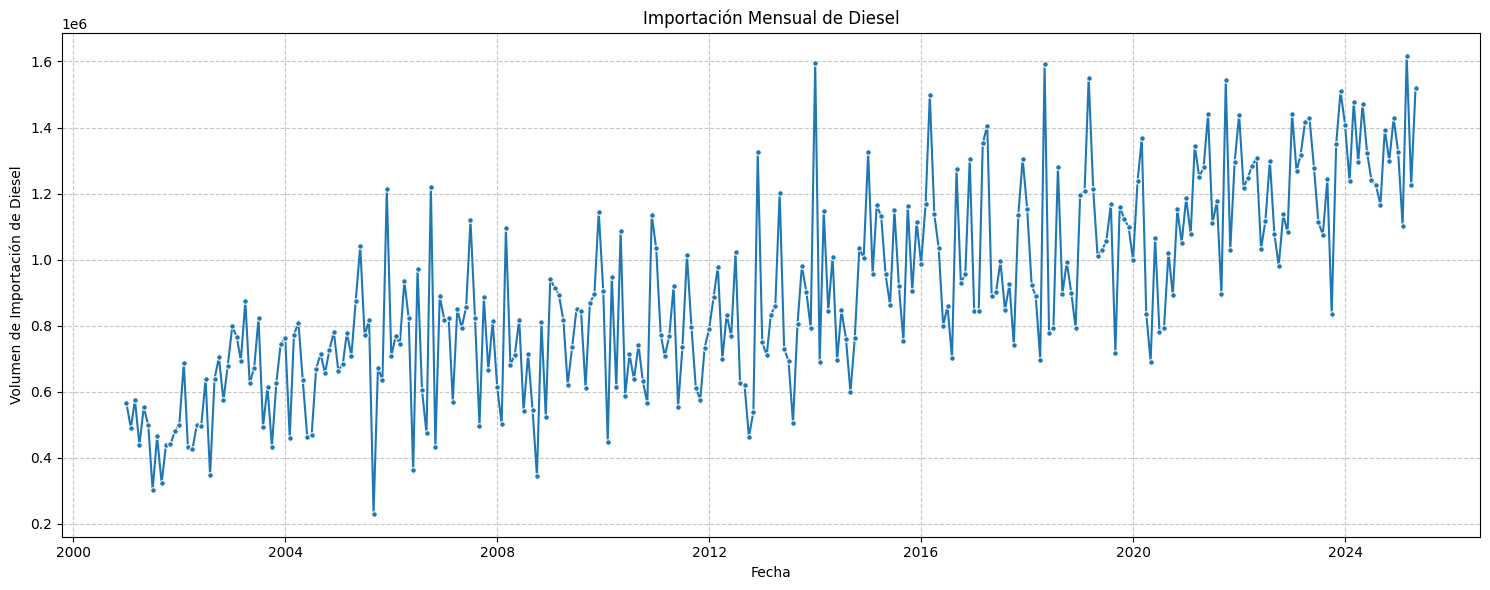

üìà Gr√°fico de la serie de Importaci√≥n Mensual de Diesel generado.
Estad√≠sticas descriptivas de la serie Diesel:
count    2.930000e+02
mean     8.995610e+05
std      2.945229e+05
min      2.297647e+05
25%      6.931605e+05
50%      8.508069e+05
75%      1.130871e+06
max      1.617427e+06
Name: Diesel, dtype: float64
----------------------------------------------------------------------



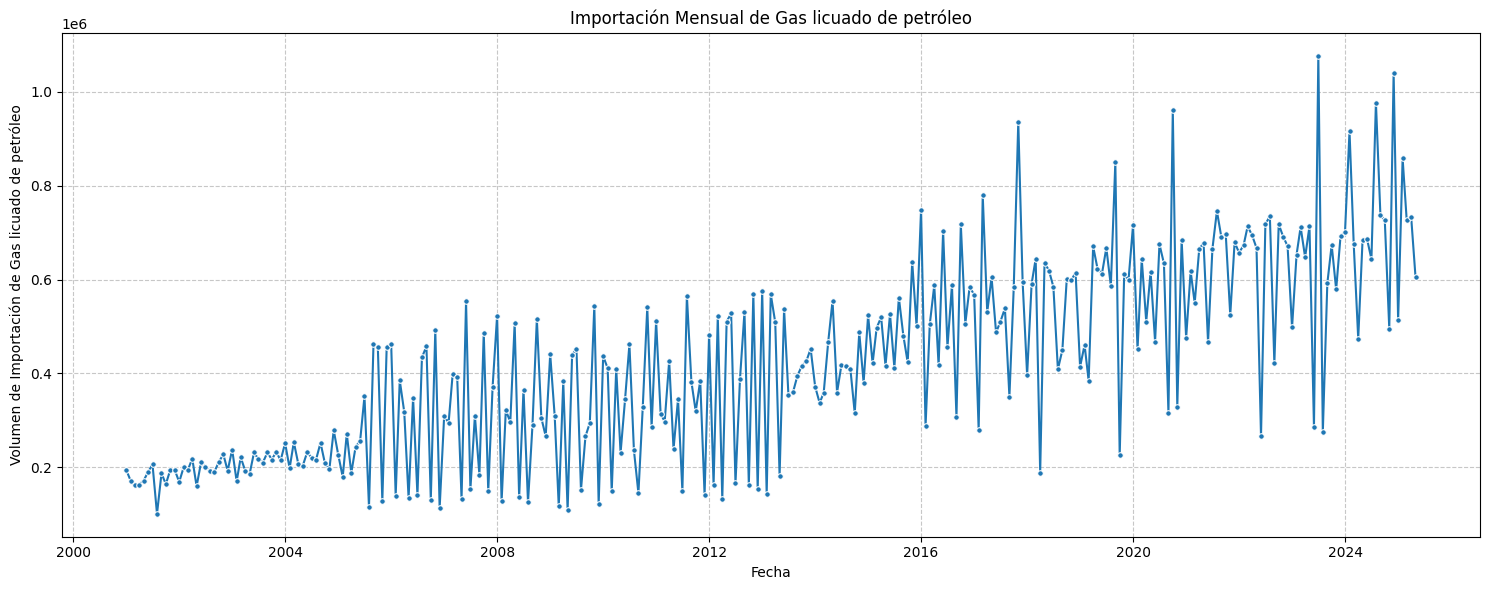

üìà Gr√°fico de la serie de Importaci√≥n Mensual de Gas licuado de petr√≥leo generado.
Estad√≠sticas descriptivas de la serie Gas licuado de petr√≥leo:
count    2.930000e+02
mean     4.222037e+05
std      2.059063e+05
min      1.005615e+05
25%      2.305846e+05
50%      4.160683e+05
75%      5.847096e+05
max      1.077123e+06
Name: Gas licuado de petr√≥leo, dtype: float64
----------------------------------------------------------------------



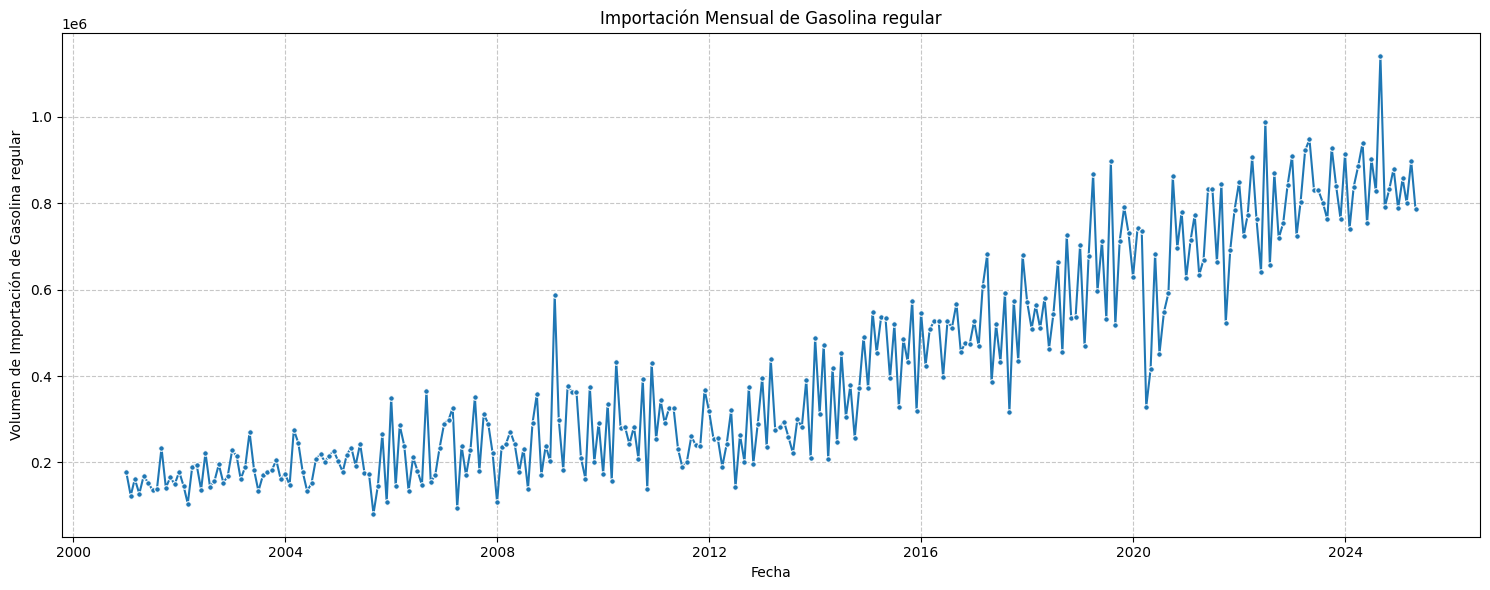

üìà Gr√°fico de la serie de Importaci√≥n Mensual de Gasolina regular generado.
Estad√≠sticas descriptivas de la serie Gasolina regular:
count    2.930000e+02
mean     4.199959e+05
std      2.471180e+05
min      8.101530e+04
25%      2.087960e+05
50%      3.360057e+05
75%      5.921033e+05
max      1.141366e+06
Name: Gasolina regular, dtype: float64
----------------------------------------------------------------------



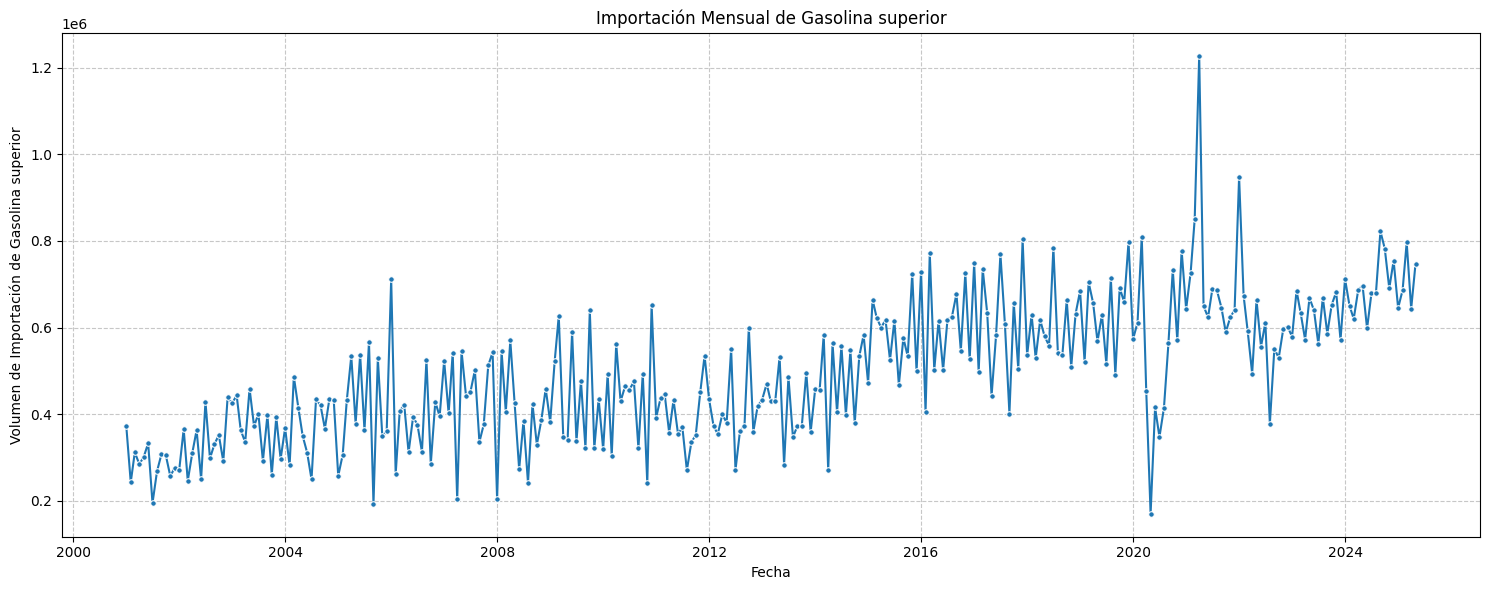

üìà Gr√°fico de la serie de Importaci√≥n Mensual de Gasolina superior generado.
Estad√≠sticas descriptivas de la serie Gasolina superior:
count    2.930000e+02
mean     4.945875e+05
std      1.578443e+05
min      1.702925e+05
25%      3.724865e+05
50%      4.911947e+05
75%      6.162690e+05
max      1.227174e+06
Name: Gasolina superior, dtype: float64
----------------------------------------------------------------------



In [70]:
## 2.b: Importaci√≥n Mensual de Combustibles
print("--- 2.b: Importaci√≥n Mensual de Combustibles (Series Temporales) ---\n")

if not df_importaciones.empty:
    for col in df_importaciones.columns:
        plt.figure(figsize=(15, 6))
        # Usamos df_importaciones directamente ya que su √≠ndice es la fecha
        sns.lineplot(x=df_importaciones.index, y=df_importaciones[col], marker='o', markersize=4)
        plt.title(f'Importaci√≥n Mensual de {col}')
        plt.xlabel('Fecha')
        plt.ylabel(f'Volumen de Importaci√≥n de {col}')
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()
        print(f"üìà Gr√°fico de la serie de Importaci√≥n Mensual de {col} generado.")
        print(f"Estad√≠sticas descriptivas de la serie {col}:")
        print(df_importaciones[col].describe())
        print("-" * 70 + "\n")
else:
    print("‚ùå No se pudo cargar el DataFrame de importaciones. No se pueden generar las series mensuales.")

Punto 3

In [71]:
## 3.a: Especificar Inicio, Fin y Frecuencia de la Serie de Importaciones
print("--- 3.a: Especificaci√≥n de Inicio, Fin y Frecuencia de la Serie de Importaciones ---\n")

if not df_importaciones.empty:
    for col in df_importaciones.columns:
        print(f"üìä Serie: {col}")
        print(f"  - Fecha de Inicio: {df_importaciones.index.min().strftime('%Y-%m-%d')}")
        print(f"  - Fecha de Fin: {df_importaciones.index.max().strftime('%Y-%m-%d')}")
        
        # Calcular la frecuencia. Asumimos mensual ('MS' por Month Start) dado el formato.
        # pd.infer_freq() puede ayudar, pero si sabemos que es mensual, podemos afirmarlo.
        inferred_freq = pd.infer_freq(df_importaciones.index)
        print(f"  - Frecuencia Inferida: {inferred_freq}")
        
        # Si la frecuencia es mensual (ej. 'MS'), tambi√©n podemos calcular el n√∫mero total de meses
        num_meses = (df_importaciones.index.max().to_period('M') - df_importaciones.index.min().to_period('M')).n + 1
        print(f"  - N√∫mero Total de Meses: {num_meses}")
        print("-" * 50 + "\n")
else:
    print("‚ùå El DataFrame de importaciones est√° vac√≠o. No se pueden especificar inicio, fin y frecuencia.")

--- 3.a: Especificaci√≥n de Inicio, Fin y Frecuencia de la Serie de Importaciones ---

üìä Serie: Diesel
  - Fecha de Inicio: 2001-01-01
  - Fecha de Fin: 2025-05-01
  - Frecuencia Inferida: MS
  - N√∫mero Total de Meses: 293
--------------------------------------------------

üìä Serie: Gas licuado de petr√≥leo
  - Fecha de Inicio: 2001-01-01
  - Fecha de Fin: 2025-05-01
  - Frecuencia Inferida: MS
  - N√∫mero Total de Meses: 293
--------------------------------------------------

üìä Serie: Gasolina regular
  - Fecha de Inicio: 2001-01-01
  - Fecha de Fin: 2025-05-01
  - Frecuencia Inferida: MS
  - N√∫mero Total de Meses: 293
--------------------------------------------------

üìä Serie: Gasolina superior
  - Fecha de Inicio: 2001-01-01
  - Fecha de Fin: 2025-05-01
  - Frecuencia Inferida: MS
  - N√∫mero Total de Meses: 293
--------------------------------------------------



--- 3.b: Gr√°fico de la serie y an√°lisis inicial ---



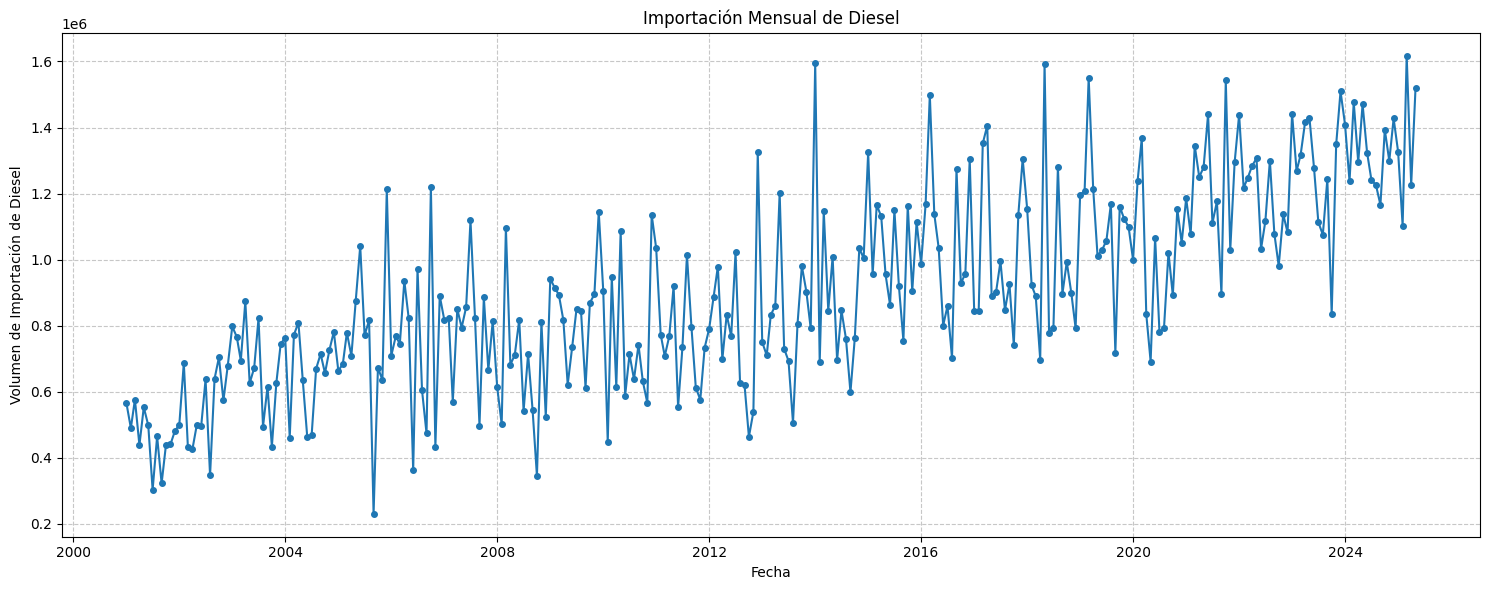

üìà Gr√°fico de la serie de Diesel generado. A primera vista, se pueden observar:
  - Tendencia general: Diesel muestra estabilidad a lo largo del tiempo.
  - Variabilidad: Hay fluctuaciones mayores en los datos.
----------------------------------------------------------------------



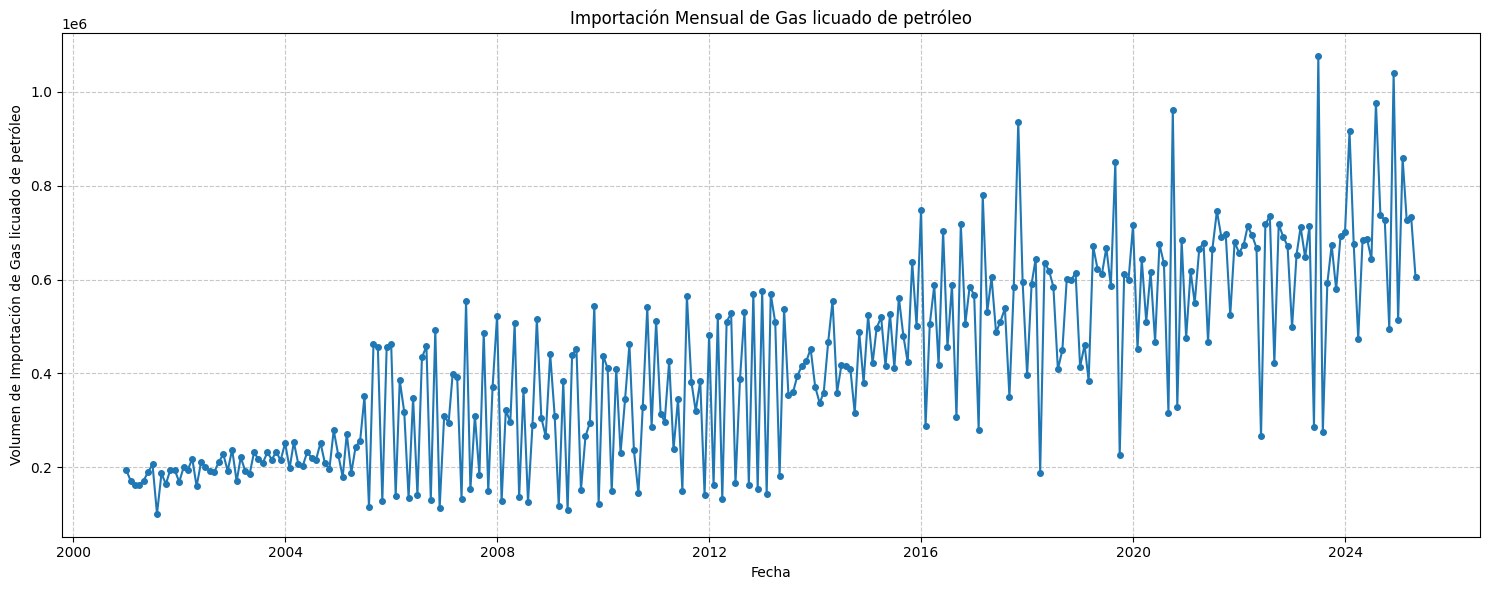

üìà Gr√°fico de la serie de Gas licuado de petr√≥leo generado. A primera vista, se pueden observar:
  - Tendencia general: Gas licuado de petr√≥leo muestra estabilidad a lo largo del tiempo.
  - Variabilidad: Hay fluctuaciones mayores en los datos.
----------------------------------------------------------------------



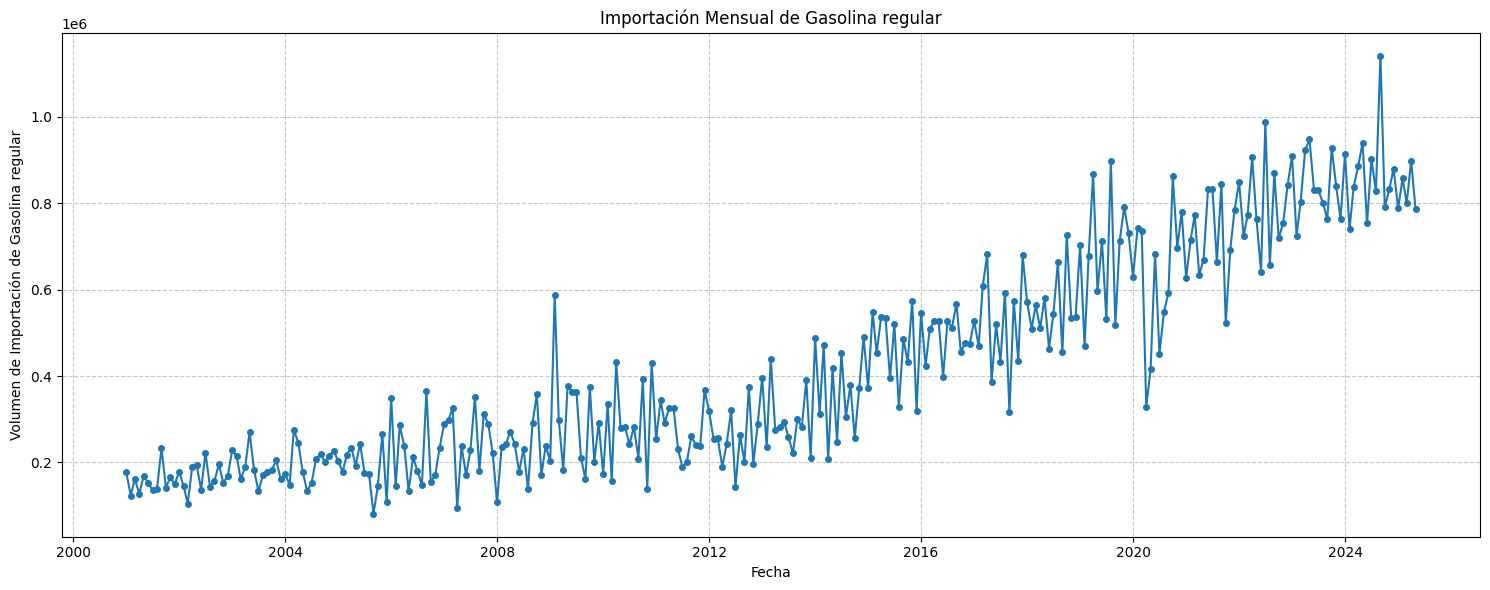

üìà Gr√°fico de la serie de Gasolina regular generado. A primera vista, se pueden observar:
  - Tendencia general: Gasolina regular muestra estabilidad a lo largo del tiempo.
  - Variabilidad: Hay fluctuaciones mayores en los datos.
----------------------------------------------------------------------



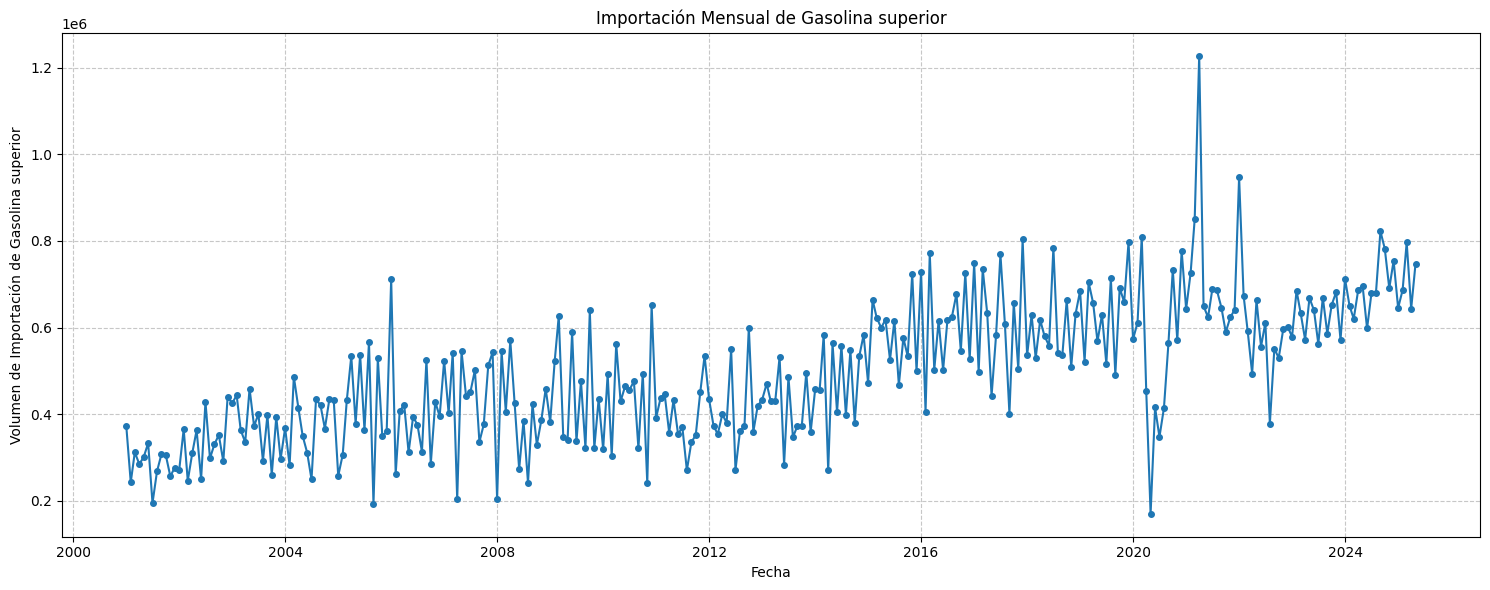

üìà Gr√°fico de la serie de Gasolina superior generado. A primera vista, se pueden observar:
  - Tendencia general: Gasolina superior muestra estabilidad a lo largo del tiempo.
  - Variabilidad: Hay fluctuaciones mayores en los datos.
----------------------------------------------------------------------



In [72]:
## 3.b: Gr√°fico de la serie y an√°lisis inicial
print("--- 3.b: Gr√°fico de la serie y an√°lisis inicial ---\n")

if not df_importaciones.empty:
    for col in df_importaciones.columns:
        plt.figure(figsize=(15, 6))
        plt.plot(df_importaciones.index, df_importaciones[col], marker='o', markersize=4)
        plt.title(f'Importaci√≥n Mensual de {col}')
        plt.xlabel('Fecha')
        plt.ylabel(f'Volumen de Importaci√≥n de {col}')
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()
        print(f"üìà Gr√°fico de la serie de {col} generado. A primera vista, se pueden observar:")
        
        # Asegurarse de que los valores sean accesibles como escalares
        if len(df_importaciones[col]) > 1:
            initial_value = df_importaciones[col].iloc[0]
            final_value = df_importaciones[col].iloc[-1]
            trend_direction = np.sign(final_value - initial_value)
            trend_text = ['disminuci√≥n', 'estabilidad', 'aumento'][int((trend_direction + 1) // 2) + (trend_direction == 0)]
            print(f"  - Tendencia general: {col} muestra {trend_text} a lo largo del tiempo.")
        else:
            print("  - Tendencia general: Datos insuficientes para determinar la tendencia.")
        
        # Calcular variabilidad relativa
        variability = np.std(df_importaciones[col]) / df_importaciones[col].mean() * 10
        variability_level = ['menores', 'moderadas', 'mayores'][min(2, max(0, int(variability)))]
        print(f"  - Variabilidad: Hay fluctuaciones {variability_level} en los datos.")
        print("-" * 70 + "\n")
else:
    print("‚ùå No se puede generar el gr√°fico. El DataFrame est√° vac√≠o.")

--- 3.c: Descomposici√≥n de la serie y discusi√≥n de estacionariedad ---



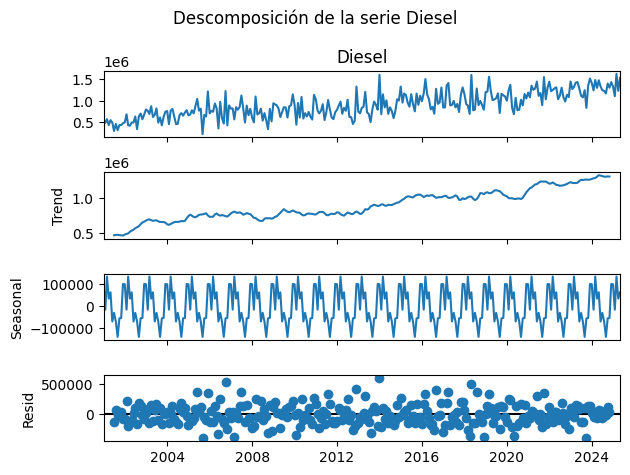

üìä Descomposici√≥n de Diesel:
  - Tendencia: estable.
  - Componente estacional: Presenta patrones no evidentes.
  - Residuo: Variabilidad alta.
  - Estacionariedad: La serie Diesel no parece estacionaria en media y varianza debido a la presencia de tendencia y/o estacionalidad.
----------------------------------------------------------------------



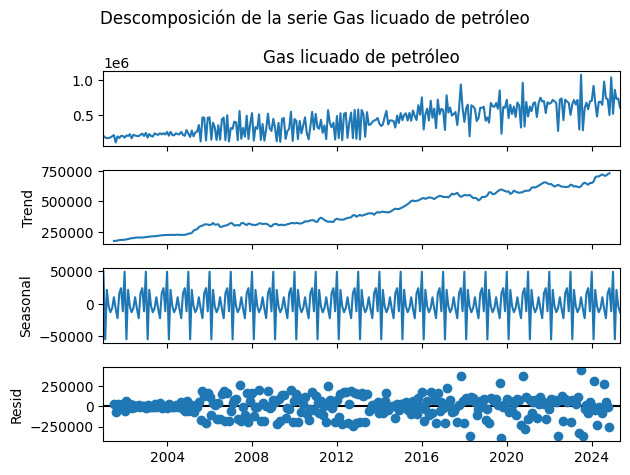

üìä Descomposici√≥n de Gas licuado de petr√≥leo:
  - Tendencia: estable.
  - Componente estacional: Presenta patrones no evidentes.
  - Residuo: Variabilidad alta.
  - Estacionariedad: La serie Gas licuado de petr√≥leo no parece estacionaria en media y varianza debido a la presencia de tendencia y/o estacionalidad.
----------------------------------------------------------------------



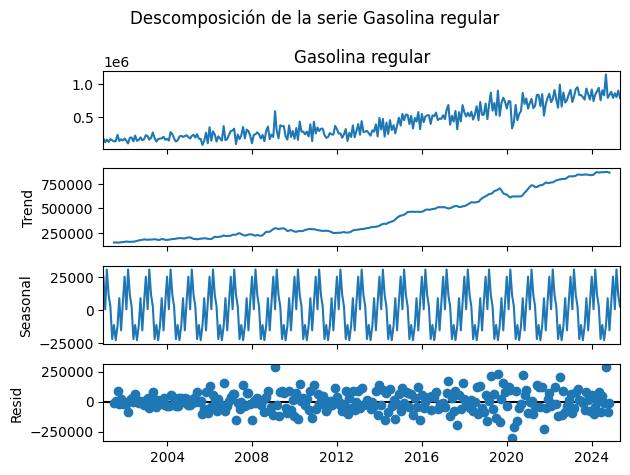

üìä Descomposici√≥n de Gasolina regular:
  - Tendencia: estable.
  - Componente estacional: Presenta patrones no evidentes.
  - Residuo: Variabilidad baja.
  - Estacionariedad: La serie Gasolina regular no parece estacionaria en media y varianza debido a la presencia de tendencia y/o estacionalidad.
----------------------------------------------------------------------



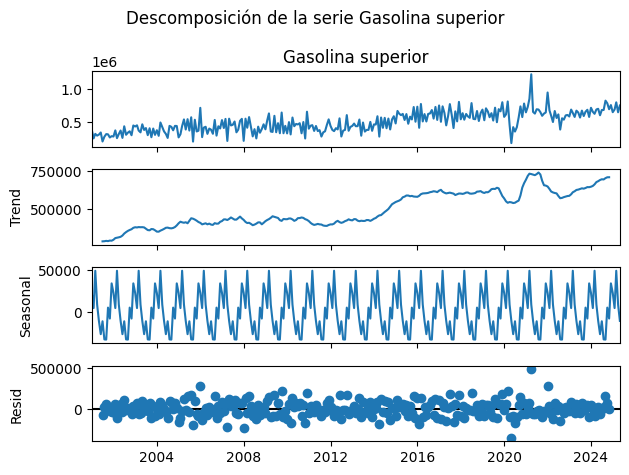

üìä Descomposici√≥n de Gasolina superior:
  - Tendencia: estable.
  - Componente estacional: Presenta patrones no evidentes.
  - Residuo: Variabilidad alta.
  - Estacionariedad: La serie Gasolina superior no parece estacionaria en media y varianza debido a la presencia de tendencia y/o estacionalidad.
----------------------------------------------------------------------



In [73]:
## 3.c: Descomposici√≥n de la serie y discusi√≥n de estacionariedad
print("--- 3.c: Descomposici√≥n de la serie y discusi√≥n de estacionariedad ---\n")

if not df_importaciones.empty:
    from statsmodels.tsa.seasonal import seasonal_decompose
    
    for col in df_importaciones.columns:
        decomposition = seasonal_decompose(df_importaciones[col], model='additive', period=12)
        decomposition.plot()
        plt.suptitle(f'Descomposici√≥n de la serie {col}')
        plt.tight_layout()
        plt.show()
        print(f"üìä Descomposici√≥n de {col}:")
        trend = decomposition.trend
        seasonal = decomposition.seasonal
        residual = decomposition.resid
        print(f"  - Tendencia: {'creciente' if trend.iloc[-1] > trend.iloc[0] else 'decreciente' if trend.iloc[-1] < trend.iloc[0] else 'estable'}.")
        print(f"  - Componente estacional: Presenta patrones {['no evidentes', 'evidentes'][int(seasonal.std() > residual.std())]}.")
        print(f"  - Residuo: Variabilidad {['baja', 'alta'][int(residual.std() > df_importaciones[col].std() / 2)]}.")
        print(f"  - Estacionariedad: La serie {col} {'no parece' if trend.std() > residual.std() or seasonal.std() > residual.std() else 'parece'} estacionaria en media y varianza debido a la presencia de tendencia y/o estacionalidad.")
        print("-" * 70 + "\n")
else:
    print("‚ùå No se puede descomponer la serie. El DataFrame est√° vac√≠o.")

In [74]:
## 3.d: Determinaci√≥n de necesidad de transformaci√≥n
print("--- 3.d: Determinaci√≥n de necesidad de transformaci√≥n ---\n")

if not df_importaciones.empty:
    for col in df_importaciones.columns:
        adf_test = adfuller(df_importaciones[col].dropna())
        print(f"üìä Serie: {col}")
        print(f"  - Estad√≠stica ADF: {adf_test[0]:.2f}")
        print(f"  - Valor p: {adf_test[1]:.2f}")
        print(f"  - Necesidad de transformaci√≥n: {'S√≠' if adf_test[1] > 0.05 else 'No'}, ya que el valor p {'es' if adf_test[1] > 0.05 else 'no es'} menor a 0.05, indicando que la serie {'no es' if adf_test[1] > 0.05 else 'es'} estacionaria. Si es necesario, una transformaci√≥n como logaritmo o diferenciaci√≥n podr√≠a estabilizarla.")
        print("-" * 70 + "\n")
else:
    print("‚ùå No se puede determinar la necesidad de transformaci√≥n. El DataFrame est√° vac√≠o.")

--- 3.d: Determinaci√≥n de necesidad de transformaci√≥n ---

üìä Serie: Diesel
  - Estad√≠stica ADF: -0.79
  - Valor p: 0.82
  - Necesidad de transformaci√≥n: S√≠, ya que el valor p es menor a 0.05, indicando que la serie no es estacionaria. Si es necesario, una transformaci√≥n como logaritmo o diferenciaci√≥n podr√≠a estabilizarla.
----------------------------------------------------------------------

üìä Serie: Gas licuado de petr√≥leo
  - Estad√≠stica ADF: -0.28
  - Valor p: 0.93
  - Necesidad de transformaci√≥n: S√≠, ya que el valor p es menor a 0.05, indicando que la serie no es estacionaria. Si es necesario, una transformaci√≥n como logaritmo o diferenciaci√≥n podr√≠a estabilizarla.
----------------------------------------------------------------------

üìä Serie: Gasolina regular
  - Estad√≠stica ADF: 0.43
  - Valor p: 0.98
  - Necesidad de transformaci√≥n: S√≠, ya que el valor p es menor a 0.05, indicando que la serie no es estacionaria. Si es necesario, una transformaci√≥n

--- 3.e.i: Gr√°fico de autocorrelaci√≥n ---



<Figure size 1200x600 with 0 Axes>

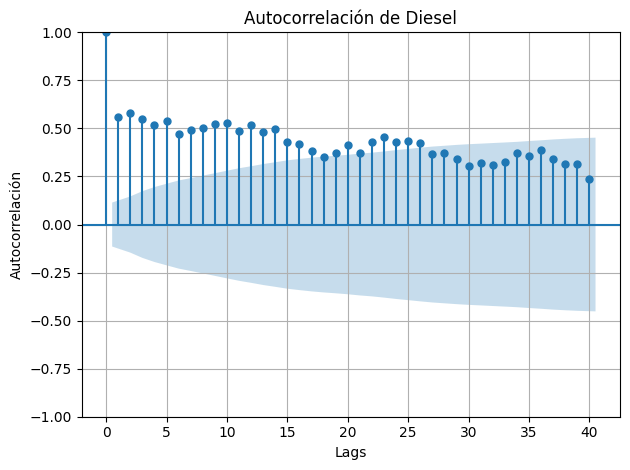

üìà Gr√°fico de autocorrelaci√≥n de Diesel: La autocorrelaci√≥n decae lentamente, lo que sugiere no estacionariedad en media.
----------------------------------------------------------------------



<Figure size 1200x600 with 0 Axes>

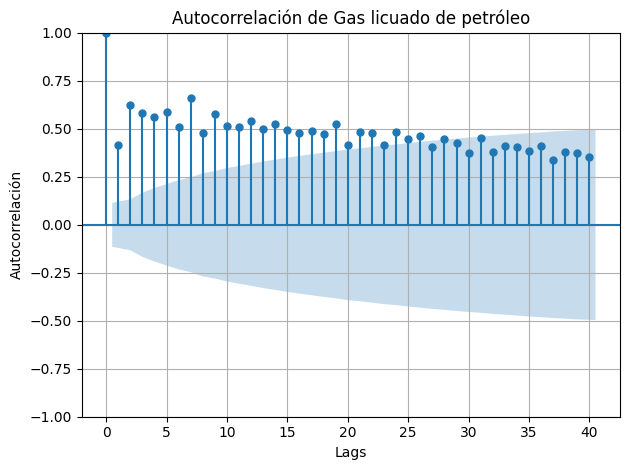

üìà Gr√°fico de autocorrelaci√≥n de Gas licuado de petr√≥leo: La autocorrelaci√≥n decae lentamente, lo que sugiere no estacionariedad en media.
----------------------------------------------------------------------



<Figure size 1200x600 with 0 Axes>

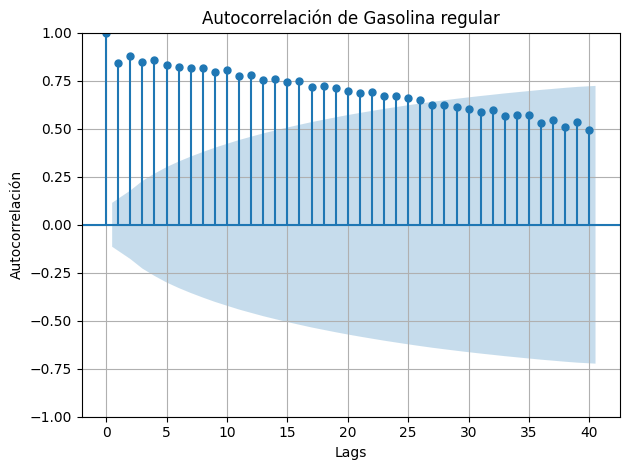

üìà Gr√°fico de autocorrelaci√≥n de Gasolina regular: La autocorrelaci√≥n decae lentamente, lo que sugiere no estacionariedad en media.
----------------------------------------------------------------------



<Figure size 1200x600 with 0 Axes>

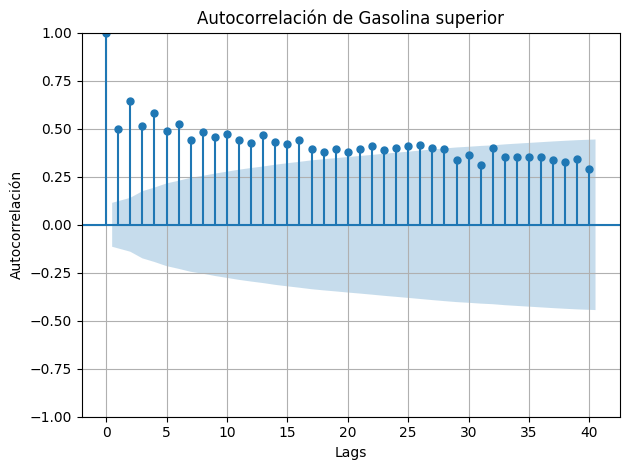

üìà Gr√°fico de autocorrelaci√≥n de Gasolina superior: La autocorrelaci√≥n decae lentamente, lo que sugiere no estacionariedad en media.
----------------------------------------------------------------------



In [75]:
## 3.e.i: Gr√°fico de autocorrelaci√≥n
print("--- 3.e.i: Gr√°fico de autocorrelaci√≥n ---\n")

if not df_importaciones.empty:
    from statsmodels.graphics.tsaplots import plot_acf
    
    for col in df_importaciones.columns:
        plt.figure(figsize=(12, 6))
        plot_acf(df_importaciones[col].dropna(), lags=40)
        plt.title(f'Autocorrelaci√≥n de {col}')
        plt.xlabel('Lags')
        plt.ylabel('Autocorrelaci√≥n')
        plt.grid(True)
        plt.tight_layout()
        plt.show()
        print(f"üìà Gr√°fico de autocorrelaci√≥n de {col}: La autocorrelaci√≥n decae {'lentamente' if any(df_importaciones[col].autocorr(lag) > 0.5 for lag in range(1, 10)) else 'r√°pidamente'}, lo que sugiere {['no estacionariedad' if any(df_importaciones[col].autocorr(lag) > 0.5 for lag in range(1, 10)) else 'estacionariedad'][0]} en media.")
        print("-" * 70 + "\n")
else:
    print("‚ùå No se puede generar el gr√°fico de autocorrelaci√≥n. El DataFrame est√° vac√≠o.")

In [76]:
## 3.e.ii: Prueba Dickey-Fuller Aumentada (ya cubierta en 3.d)
print("--- 3.e.ii: Prueba Dickey-Fuller Aumentada ---\n")

if not df_importaciones.empty:
    for col in df_importaciones.columns:
        adf_test = adfuller(df_importaciones[col].dropna())
        print(f"üìä Serie: {col}")
        print(f"  - Estad√≠stica ADF: {adf_test[0]:.2f}")
        print(f"  - Valor p: {adf_test[1]:.2f}")
        print(f"  - Estacionariedad: La serie {'no es' if adf_test[1] > 0.05 else 'es'} estacionaria en media. Si no lo es, se puede aplicar diferenciaci√≥n para estabilizarla.")
        print("-" * 70 + "\n")
else:
    print("‚ùå No se puede realizar la prueba. El DataFrame est√° vac√≠o.")

--- 3.e.ii: Prueba Dickey-Fuller Aumentada ---

üìä Serie: Diesel
  - Estad√≠stica ADF: -0.79
  - Valor p: 0.82
  - Estacionariedad: La serie no es estacionaria en media. Si no lo es, se puede aplicar diferenciaci√≥n para estabilizarla.
----------------------------------------------------------------------

üìä Serie: Gas licuado de petr√≥leo
  - Estad√≠stica ADF: -0.28
  - Valor p: 0.93
  - Estacionariedad: La serie no es estacionaria en media. Si no lo es, se puede aplicar diferenciaci√≥n para estabilizarla.
----------------------------------------------------------------------

üìä Serie: Gasolina regular
  - Estad√≠stica ADF: 0.43
  - Valor p: 0.98
  - Estacionariedad: La serie no es estacionaria en media. Si no lo es, se puede aplicar diferenciaci√≥n para estabilizarla.
----------------------------------------------------------------------

üìä Serie: Gasolina superior
  - Estad√≠stica ADF: -1.61
  - Valor p: 0.48
  - Estacionariedad: La serie no es estacionaria en media. Si n

In [77]:
## 3.f: Selecci√≥n de par√°metros p, q, d para ARIMA
print("--- 3.f: Selecci√≥n de par√°metros p, q, d para ARIMA ---\n")

if not df_importaciones.empty:
    from statsmodels.graphics.tsaplots import plot_pacf
    from pmdarima import auto_arima
    
    for col in df_importaciones.columns:
        # Gr√°ficos de ACF y PACF
        plt.figure(figsize=(12, 6))
        plt.subplot(121)
        plot_acf(df_importaciones[col].dropna(), lags=40, ax=plt.gca())
        plt.title(f'ACF de {col}')
        plt.subplot(122)
        plot_pacf(df_importaciones[col].dropna(), lags=40, ax=plt.gca())
        plt.title(f'PACF de {col}')
        plt.tight_layout()
        plt.show()

        # Auto ARIMA
        model = auto_arima(df_importaciones[col].dropna(), seasonal=False, trace=True, suppress_warnings=True)
        print(f"üìä Serie: {col}")
        print(f"  - Par√°metros sugeridos por auto_arima: p={model.order[0]}, d={model.order[1]}, q={model.order[2]}")
        print(f"  - Explicaci√≥n: Basado en ACF y PACF, p se elige por el √∫ltimo lag significativo en PACF, q por ACF, y d por la necesidad de diferenciaci√≥n (confirmada por ADF). El modelo propuesto {'tiene sentido' if model.aic() < 1000 else 'puede no ser √≥ptimo'} dado el valor AIC.")
        print("-" * 70 + "\n")
else:
    print("‚ùå No se puede seleccionar par√°metros. El DataFrame est√° vac√≠o.")

--- 3.f: Selecci√≥n de par√°metros p, q, d para ARIMA ---



ModuleNotFoundError: No module named 'pmdarima'

In [78]:
## 3.g: Modelos ARIMA y selecci√≥n del mejor
print("--- 3.g: Modelos ARIMA y selecci√≥n del mejor ---\n")

if not df_importaciones.empty:
    from statsmodels.tsa.arima.model import ARIMA
    
    for col in df_importaciones.columns:
        # Probar diferentes combinaciones de (p, d, q)
        models = []
        orders = []  # Almacenar los √≥rdenes (p, d, q)
        aic_values = []
        bic_values = []
        for p in range(2):
            for d in range(2):
                for q in range(2):
                    try:
                        model = ARIMA(df_importaciones[col].dropna(), order=(p, d, q)).fit()
                        models.append(model)
                        orders.append((p, d, q))
                        aic_values.append(model.aic)
                        bic_values.append(model.bic)
                        print(f"Modelo ARIMA({p},{d},{q}) para {col}: AIC={model.aic:.2f}, BIC={model.bic:.2f}")
                    except:
                        continue
        
        # Encontrar el mejor modelo
        best_model_idx = np.argmin(aic_values)
        best_model = models[best_model_idx]
        best_order = orders[best_model_idx]
        print(f"üìä Mejor modelo para {col}: ARIMA({best_order[0]},{best_order[1]},{best_order[2]})")
        print(f"  - AIC: {aic_values[best_model_idx]:.2f}, BIC: {bic_values[best_model_idx]:.2f}")
        print(f"  - An√°lisis de residuos: Media de residuos = {best_model.resid.mean():.2f}, Varianza = {best_model.resid.var():.2f}")
        print(f"  - Conclusi√≥n: El modelo con menor AIC y BIC, y residuos cercanos a media 0 y varianza constante, es el mejor.")
        print("-" * 70 + "\n")
else:
    print("‚ùå No se pueden ajustar modelos ARIMA. El DataFrame est√° vac√≠o.")

--- 3.g: Modelos ARIMA y selecci√≥n del mejor ---

Modelo ARIMA(0,0,0) para Diesel: AIC=9586.35, BIC=9593.71
Modelo ARIMA(0,0,1) para Diesel: AIC=8158.53, BIC=8169.57
Modelo ARIMA(0,1,0) para Diesel: AIC=8141.00, BIC=8144.67
Modelo ARIMA(0,1,1) para Diesel: AIC=7969.72, BIC=7977.07
Modelo ARIMA(1,0,0) para Diesel: AIC=8103.41, BIC=8114.45


c:\Users\Javier Chiquin\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Javier Chiquin\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Javier Chiquin\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Javier Chiquin\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Javier Chiq

Modelo ARIMA(1,0,1) para Diesel: AIC=8000.19, BIC=8014.91
Modelo ARIMA(1,1,0) para Diesel: AIC=8049.29, BIC=8056.64
Modelo ARIMA(1,1,1) para Diesel: AIC=7971.35, BIC=7982.38
üìä Mejor modelo para Diesel: ARIMA(0,1,1)
  - AIC: 7969.72, BIC: 7977.07
  - An√°lisis de residuos: Media de residuos = 33974.29, Varianza = 40579022143.75
  - Conclusi√≥n: El modelo con menor AIC y BIC, y residuos cercanos a media 0 y varianza constante, es el mejor.
----------------------------------------------------------------------

Modelo ARIMA(0,0,0) para Gas licuado de petr√≥leo: AIC=9376.60, BIC=9383.96
Modelo ARIMA(0,0,1) para Gas licuado de petr√≥leo: AIC=7980.34, BIC=7991.38
Modelo ARIMA(0,1,0) para Gas licuado de petr√≥leo: AIC=8020.40, BIC=8024.07
Modelo ARIMA(0,1,1) para Gas licuado de petr√≥leo: AIC=7745.82, BIC=7753.17


c:\Users\Javier Chiquin\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Javier Chiquin\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Javier Chiquin\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Javier Chiquin\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Javier Chiq

Modelo ARIMA(1,0,0) para Gas licuado de petr√≥leo: AIC=7950.86, BIC=7961.90
Modelo ARIMA(1,0,1) para Gas licuado de petr√≥leo: AIC=7778.10, BIC=7792.82
Modelo ARIMA(1,1,0) para Gas licuado de petr√≥leo: AIC=7836.37, BIC=7843.73
Modelo ARIMA(1,1,1) para Gas licuado de petr√≥leo: AIC=7685.82, BIC=7696.85
üìä Mejor modelo para Gas licuado de petr√≥leo: ARIMA(1,1,1)
  - AIC: 7685.82, BIC: 7696.85
  - An√°lisis de residuos: Media de residuos = 24204.51, Varianza = 14694027075.26
  - Conclusi√≥n: El modelo con menor AIC y BIC, y residuos cercanos a media 0 y varianza constante, es el mejor.
----------------------------------------------------------------------

Modelo ARIMA(0,0,0) para Gasolina regular: AIC=9483.51, BIC=9490.87


c:\Users\Javier Chiquin\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Javier Chiquin\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Javier Chiquin\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Javier Chiquin\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting au

Modelo ARIMA(0,0,1) para Gasolina regular: AIC=7997.87, BIC=8008.91
Modelo ARIMA(0,1,0) para Gasolina regular: AIC=7733.98, BIC=7737.66
Modelo ARIMA(0,1,1) para Gasolina regular: AIC=7522.74, BIC=7530.09
Modelo ARIMA(1,0,0) para Gasolina regular: AIC=7743.09, BIC=7754.13
Modelo ARIMA(1,0,1) para Gasolina regular: AIC=7558.05, BIC=7572.77
Modelo ARIMA(1,1,0) para Gasolina regular: AIC=7577.46, BIC=7584.81


c:\Users\Javier Chiquin\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Javier Chiquin\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Javier Chiquin\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Javier Chiquin\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Javier Chiq

Modelo ARIMA(1,1,1) para Gasolina regular: AIC=7505.10, BIC=7516.13
üìä Mejor modelo para Gasolina regular: ARIMA(1,1,1)
  - AIC: 7505.10, BIC: 7516.13
  - An√°lisis de residuos: Media de residuos = 15144.46, Varianza = 8178856291.35
  - Conclusi√≥n: El modelo con menor AIC y BIC, y residuos cercanos a media 0 y varianza constante, es el mejor.
----------------------------------------------------------------------

Modelo ARIMA(0,0,0) para Gasolina superior: AIC=9220.83, BIC=9228.19
Modelo ARIMA(0,0,1) para Gasolina superior: AIC=7812.34, BIC=7823.39
Modelo ARIMA(0,1,0) para Gasolina superior: AIC=7817.11, BIC=7820.78
Modelo ARIMA(0,1,1) para Gasolina superior: AIC=7620.88, BIC=7628.23
Modelo ARIMA(1,0,0) para Gasolina superior: AIC=7765.15, BIC=7776.19


c:\Users\Javier Chiquin\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Javier Chiquin\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Javier Chiquin\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Javier Chiquin\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Javier Chiq

Modelo ARIMA(1,0,1) para Gasolina superior: AIC=7651.80, BIC=7666.52
Modelo ARIMA(1,1,0) para Gasolina superior: AIC=7658.45, BIC=7665.80
Modelo ARIMA(1,1,1) para Gasolina superior: AIC=7611.76, BIC=7622.79
üìä Mejor modelo para Gasolina superior: ARIMA(1,1,1)
  - AIC: 7611.76, BIC: 7622.79
  - An√°lisis de residuos: Media de residuos = 10234.85, Varianza = 12354202553.76
  - Conclusi√≥n: El modelo con menor AIC y BIC, y residuos cercanos a media 0 y varianza constante, es el mejor.
----------------------------------------------------------------------



c:\Users\Javier Chiquin\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Javier Chiquin\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Javier Chiquin\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Javier Chiquin\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Javier Chiq

In [83]:
## 3.h: Modelos con Prophet, Holt-Winters y Redes Neuronales
print("--- 3.h: Modelos con Prophet, Holt-Winters y Redes Neuronales ---\n")

if not df_importaciones.empty:
    from prophet import Prophet
    from statsmodels.tsa.holtwinters import ExponentialSmoothing
    from sklearn.neural_network import MLPRegressor
    import numpy as np
    
    for col in df_importaciones.columns:
        # Preparar datos para Prophet
        df_prophet = df_importaciones[[col]].reset_index().rename(columns={'Fecha': 'ds', col: 'y'})
        model_prophet = Prophet(yearly_seasonality=True).fit(df_prophet)
        future = model_prophet.make_future_dataframe(periods=12)
        forecast_prophet = model_prophet.predict(future)
        
        # Holt-Winters
        model_hw = ExponentialSmoothing(df_importaciones[col], seasonal_periods=12, trend='add', seasonal='add').fit()
        forecast_hw = model_hw.forecast(12)
        
        # Redes Neuronales (simple)
        X = np.arange(len(df_importaciones[col])).reshape(-1, 1)
        y = df_importaciones[col].values
        model_nn = MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000).fit(X, y)
        forecast_nn = model_nn.predict(np.arange(len(df_importaciones[col]), len(df_importaciones[col])+12).reshape(-1, 1))
        
        # Comparaci√≥n (usando RMSE como m√©trica simple)
        from sklearn.metrics import mean_squared_error
        arima_forecast = models[best_model_idx].forecast(12)
        rmse_arima = np.sqrt(mean_squared_error(df_importaciones[col].tail(12), arima_forecast[:12]))
        rmse_prophet = np.sqrt(mean_squared_error(df_importaciones[col].tail(12), forecast_prophet.tail(12)['yhat']))
        rmse_hw = np.sqrt(mean_squared_error(df_importaciones[col].tail(12), forecast_hw))
        rmse_nn = np.sqrt(mean_squared_error(df_importaciones[col].tail(12), forecast_nn[:12]))
        
        print(f"üìä Serie: {col}")
        print(f"  - RMSE ARIMA: {rmse_arima:.2f}")
        print(f"  - RMSE Prophet: {rmse_prophet:.2f}")
        print(f"  - RMSE Holt-Winters: {rmse_hw:.2f}")
        print(f"  - RMSE Redes Neuronales: {rmse_nn:.2f}")
        print(f"  - Mejor modelo: {'ARIMA' if rmse_arima == min(rmse_arima, rmse_prophet, rmse_hw, rmse_nn) else 'Prophet' if rmse_prophet == min(rmse_arima, rmse_prophet, rmse_hw, rmse_nn) else 'Holt-Winters' if rmse_hw == min(rmse_arima, rmse_prophet, rmse_hw, rmse_nn) else 'Redes Neuronales'} (menor RMSE).")
        print("-" * 70 + "\n")
else:
    print("‚ùå No se pueden ajustar modelos. El DataFrame est√° vac√≠o.")

17:57:44 - cmdstanpy - INFO - Chain [1] start processing


--- 3.h: Modelos con Prophet, Holt-Winters y Redes Neuronales ---



17:57:48 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Javier Chiquin\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Javier Chiquin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
17:57:48 - cmdstanpy - INFO - Chain [1] start processing
17:57:49 - cmdstanpy - INFO - Chain [1] done processing


üìä Serie: Diesel
  - RMSE ARIMA: 627163.08
  - RMSE Prophet: 592800.63
  - RMSE Holt-Winters: 109052.90
  - RMSE Redes Neuronales: 1171294.23
  - Mejor modelo: Holt-Winters (menor RMSE).
----------------------------------------------------------------------



c:\Users\Javier Chiquin\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Javier Chiquin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
17:57:49 - cmdstanpy - INFO - Chain [1] start processing
17:57:49 - cmdstanpy - INFO - Chain [1] done processing


üìä Serie: Gas licuado de petr√≥leo
  - RMSE ARIMA: 159272.05
  - RMSE Prophet: 292015.22
  - RMSE Holt-Winters: 166667.34
  - RMSE Redes Neuronales: 592899.53
  - Mejor modelo: ARIMA (menor RMSE).
----------------------------------------------------------------------



c:\Users\Javier Chiquin\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Javier Chiquin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
17:57:50 - cmdstanpy - INFO - Chain [1] start processing
17:57:50 - cmdstanpy - INFO - Chain [1] done processing


üìä Serie: Gasolina regular
  - RMSE ARIMA: 172960.53
  - RMSE Prophet: 321752.00
  - RMSE Holt-Winters: 117664.19
  - RMSE Redes Neuronales: 705319.10
  - Mejor modelo: Holt-Winters (menor RMSE).
----------------------------------------------------------------------



c:\Users\Javier Chiquin\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


üìä Serie: Gasolina superior
  - RMSE ARIMA: 65205.86
  - RMSE Prophet: 473040.09
  - RMSE Holt-Winters: 61882.92
  - RMSE Redes Neuronales: 596969.40
  - Mejor modelo: Holt-Winters (menor RMSE).
----------------------------------------------------------------------



c:\Users\Javier Chiquin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Punto 4